In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from mpl_toolkits import mplot3d
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
pd.options.display.max_columns = None

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')

# Visualize Tree
from sklearn.tree import export_graphviz
from IPython.display import Image
from os import system

# Display settings
pd.options.display.max_rows = 10000
pd.options.display.max_columns = 10000

In [2]:
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials
 
 
# # Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)
# link = 'https://drive.google.com/file/d/1D4z13rFbwe6ch0WwEiCO2dd5a18avot6/view?usp=sharing'
# link2 = 'https://drive.google.com/file/d/1qLbITeJToHCKtzG2HnvSZUn5v3LeW7lg/view?usp=sharing'
 
# import pandas as pd
 
# # to get the id part of the file
# id = link.split("/")[-2]
# id2 = link2.split("/")[-2]
 
# downloaded = drive.CreateFile({'id':id})
# downloaded.GetContentFile('Train_Set_TVS.csv') 
df_train = pd.read_csv("train_F3fUq2S.csv")
df_train.head()

campaign_id  sender  subject_len  body_len  mean_paragraph_len  \
0            1       3           76     10439                  39   
1            2       3           54      2570                 256   
2            3       3           59     12801                  16   
3            4       3           74     11037                  30   
4            5       3           80     10011                  27   

   day_of_week  is_weekend times_of_day  category  product  no_of_CTA  \
0            5           1         Noon         6       26          3   
1            5           1      Morning         2       11          0   
2            5           1         Noon         2       11          3   
3            4           0      Evening        15        9          4   
4            5           1         Noon         6       26          3   

   mean_CTA_len  is_image  is_personalised  is_quote  is_timer  is_emoticons  \
0            29         0                0         0         0             0   
1            22         0                0         0         0             0   
2            23         1                0         1         0             0   
3            24         0                0         0         0             0   
4            31         0                0         1         0             0   

   is_discount  is_price  is_urgency  target_audience  click_rate  
0            0         0           0               14    0.103079  
1            0         0           0               10    0.700000  
2            0         0           0               16    0.002769  
3            0         0           0               10    0.010868  
4            0         0           0               14    0.142826

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 22 columns):
campaign_id           1888 non-null int64
sender                1888 non-null int64
subject_len           1888 non-null int64
body_len              1888 non-null int64
mean_paragraph_len    1888 non-null int64
day_of_week           1888 non-null int64
is_weekend            1888 non-null int64
times_of_day          1888 non-null object
category              1888 non-null int64
product               1888 non-null int64
no_of_CTA             1888 non-null int64
mean_CTA_len          1888 non-null int64
is_image              1888 non-null int64
is_personalised       1888 non-null int64
is_quote              1888 non-null int64
is_timer              1888 non-null int64
is_emoticons          1888 non-null int64
is_discount           1888 non-null int64
is_price              1888 non-null int64
is_urgency            1888 non-null int64
target_audience       1888 non-null int64
click_rate

In [4]:
df_train.shape

(1888, 22)

In [5]:
df_train.describe()

campaign_id       sender  subject_len      body_len  \
count  1888.000000  1888.000000  1888.000000   1888.000000   
mean    944.500000     4.395657    86.246292  14185.780191   
std     545.162973     3.277927    30.143206   7327.615307   
min       1.000000     0.000000     9.000000     23.000000   
25%     472.750000     3.000000    69.000000   9554.500000   
50%     944.500000     3.000000    83.000000  12689.000000   
75%    1416.250000     3.000000    98.000000  17351.500000   
max    1888.000000    15.000000   265.000000  44491.000000   

       mean_paragraph_len  day_of_week   is_weekend     category      product  \
count         1888.000000  1888.000000  1888.000000  1888.000000  1888.000000   
mean            35.239407     2.828390     0.199682     9.949682    17.525424   
std             28.139498     1.763193     0.399867     5.300719    12.369526   
min              4.000000     0.000000     0.000000     0.000000     0.000000   
25%             21.000000     1.000000     0.000000     6.000000     9.000000   
50%             29.000000     3.000000     0.000000    10.000000    12.000000   
75%             40.000000     4.000000     0.000000    15.000000    27.250000   
max            286.000000     6.000000     1.000000    15.000000    43.000000   

         no_of_CTA  mean_CTA_len     is_image  is_personalised     is_quote  \
count  1888.000000   1888.000000  1888.000000      1888.000000  1888.000000   
mean      4.222458     30.233051     0.909958         0.056674     0.834216   
std       4.628348     11.848663     0.866467         0.231279     1.033901   
min       0.000000      0.000000     0.000000         0.000000     0.000000   
25%       2.000000     23.000000     0.000000         0.000000     0.000000   
50%       3.000000     29.000000     1.000000         0.000000     1.000000   
75%       5.000000     35.000000     2.000000         0.000000     1.000000   
max      49.000000    162.000000     6.000000         1.000000     6.000000   

       is_timer  is_emoticons  is_discount      is_price   is_urgency  \
count    1888.0   1888.000000  1888.000000   1888.000000  1888.000000   
mean        0.0      0.210805     0.039725     40.197034     0.112288   
std         0.0      0.613442     0.195363    553.957470     0.315804   
min         0.0      0.000000     0.000000      0.000000     0.000000   
25%         0.0      0.000000     0.000000      0.000000     0.000000   
50%         0.0      0.000000     0.000000      0.000000     0.000000   
75%         0.0      0.000000     0.000000      0.000000     0.000000   
max         0.0      6.000000     1.000000  14999.000000     1.000000   

       target_audience   click_rate  
count      1888.000000  1888.000000  
mean         11.634534     0.041888  
std           2.949121     0.084223  
min           0.000000     0.000000  
25%          12.000000     0.005413  
50%          12.000000     0.010686  
75%          12.000000     0.035589  
max          16.000000     0.897959

In [6]:
df_train.describe(include='all')

campaign_id       sender  subject_len      body_len  \
count   1888.000000  1888.000000  1888.000000   1888.000000   
unique          NaN          NaN          NaN           NaN   
top             NaN          NaN          NaN           NaN   
freq            NaN          NaN          NaN           NaN   
mean     944.500000     4.395657    86.246292  14185.780191   
std      545.162973     3.277927    30.143206   7327.615307   
min        1.000000     0.000000     9.000000     23.000000   
25%      472.750000     3.000000    69.000000   9554.500000   
50%      944.500000     3.000000    83.000000  12689.000000   
75%     1416.250000     3.000000    98.000000  17351.500000   
max     1888.000000    15.000000   265.000000  44491.000000   

        mean_paragraph_len  day_of_week   is_weekend times_of_day  \
count          1888.000000  1888.000000  1888.000000         1888   
unique                 NaN          NaN          NaN            3   
top                    NaN          NaN          NaN      Evening   
freq                   NaN          NaN          NaN         1317   
mean             35.239407     2.828390     0.199682          NaN   
std              28.139498     1.763193     0.399867          NaN   
min               4.000000     0.000000     0.000000          NaN   
25%              21.000000     1.000000     0.000000          NaN   
50%              29.000000     3.000000     0.000000          NaN   
75%              40.000000     4.000000     0.000000          NaN   
max             286.000000     6.000000     1.000000          NaN   

           category      product    no_of_CTA  mean_CTA_len     is_image  \
count   1888.000000  1888.000000  1888.000000   1888.000000  1888.000000   
unique          NaN          NaN          NaN           NaN          NaN   
top             NaN          NaN          NaN           NaN          NaN   
freq            NaN          NaN          NaN           NaN          NaN   
mean       9.949682    17.525424     4.222458     30.233051     0.909958   
std        5.300719    12.369526     4.628348     11.848663     0.866467   
min        0.000000     0.000000     0.000000      0.000000     0.000000   
25%        6.000000     9.000000     2.000000     23.000000     0.000000   
50%       10.000000    12.000000     3.000000     29.000000     1.000000   
75%       15.000000    27.250000     5.000000     35.000000     2.000000   
max       15.000000    43.000000    49.000000    162.000000     6.000000   

        is_personalised     is_quote  is_timer  is_emoticons  is_discount  \
count       1888.000000  1888.000000    1888.0   1888.000000  1888.000000   
unique              NaN          NaN       NaN           NaN          NaN   
top                 NaN          NaN       NaN           NaN          NaN   
freq                NaN          NaN       NaN           NaN          NaN   
mean           0.056674     0.834216       0.0      0.210805     0.039725   
std            0.231279     1.033901       0.0      0.613442     0.195363   
min            0.000000     0.000000       0.0      0.000000     0.000000   
25%            0.000000     0.000000       0.0      0.000000     0.000000   
50%            0.000000     1.000000       0.0      0.000000     0.000000   
75%            0.000000     1.000000       0.0      0.000000     0.000000   
max            1.000000     6.000000       0.0      6.000000     1.000000   

            is_price   is_urgency  target_audience   click_rate  
count    1888.000000  1888.000000      1888.000000  1888.000000  
unique           NaN          NaN              NaN          NaN  
top              NaN          NaN              NaN          NaN  
freq             NaN          NaN              NaN          NaN  
mean       40.197034     0.112288        11.634534     0.041888  
std       553.957470     0.315804         2.949121     0.084223  
min         0.000000     0.000000         0.000000     0.000000  
25%         0.000000     0.000000        12.000000     0

In [7]:
df_train['click_rate'].value_counts()

0.000000    39
0.500000     5
0.083333     4
0.100000     3
0.166667     3
0.008403     3
0.033333     3
0.076923     3
0.125000     3
0.062500     2
0.011547     2
0.175676     2
0.354545     2
0.045455     2
0.064516     2
0.036000     2
0.090909     2
0.072464     2
0.111111     2
0.036036     2
0.030303     2
0.029412     2
0.333333     2
0.010417     2
0.666667     2
0.037037     2
0.010000     2
0.061538     2
0.010204     2
0.046875     2
0.009568     1
0.023410     1
0.007117     1
0.018909     1
0.012014     1
0.003626     1
0.004680     1
0.003644     1
0.002949     1
0.182203     1
0.000843     1
0.009739     1
0.011379     1
0.014721     1
0.030181     1
0.007724     1
0.011942     1
0.008302     1
0.008576     1
0.018344     1
0.156863     1
0.700000     1
0.050000     1
0.060377     1
0.169014     1
0.003058     1
0.008828     1
0.117778     1
0.005249     1
0.022388     1
0.009126     1
0.009722     1
0.035081     1
0.014320     1
0.002252     1
0.063134     1
0.238388  

In [8]:
df_train.isnull().sum()

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
click_rate            0
dtype: int64

In [9]:
pd.pivot_table(df_train, values=['click_rate'], index=['times_of_day'])

click_rate
times_of_day            
Evening         0.033664
Morning         0.079795
Noon            0.055602

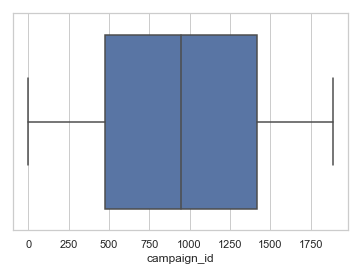

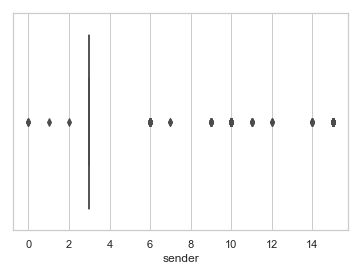

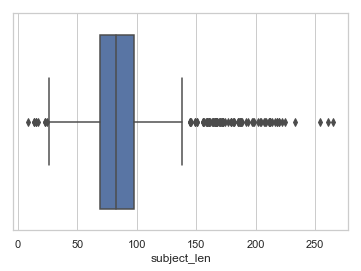

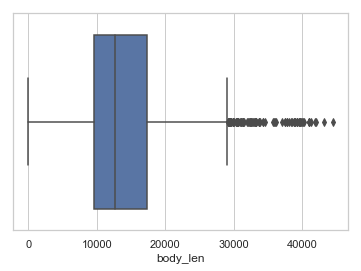

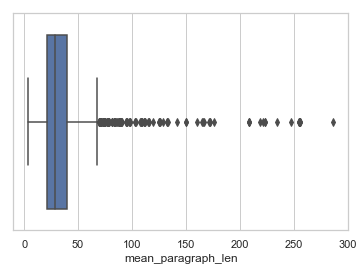

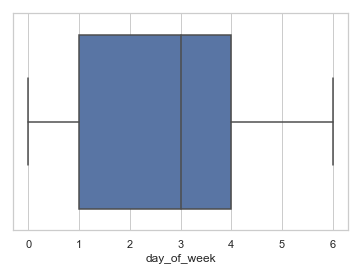

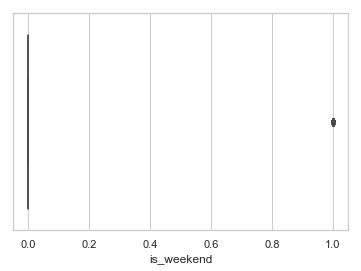

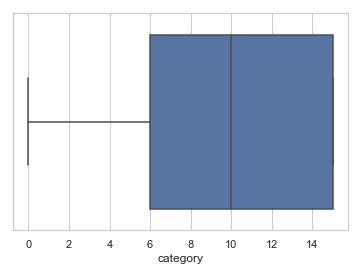

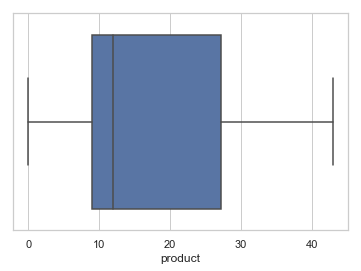

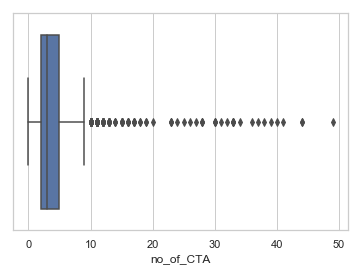

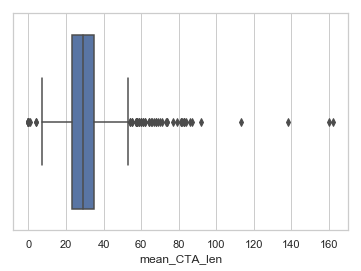

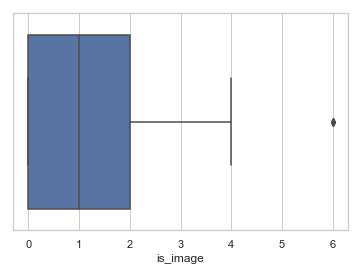

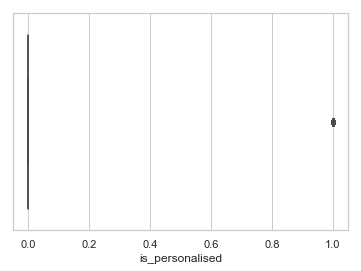

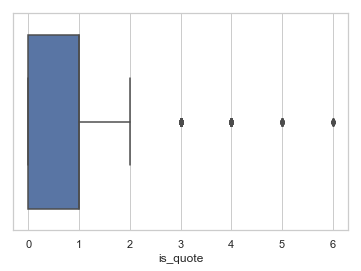

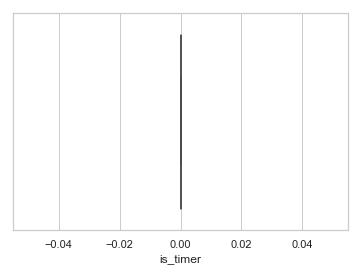

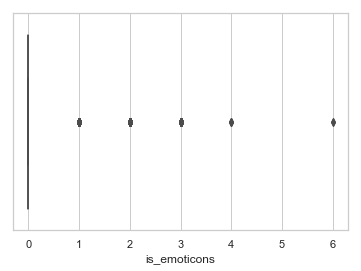

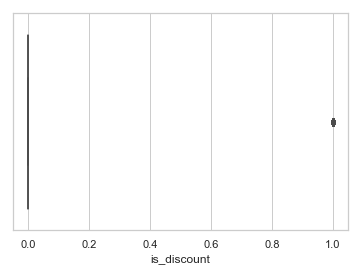

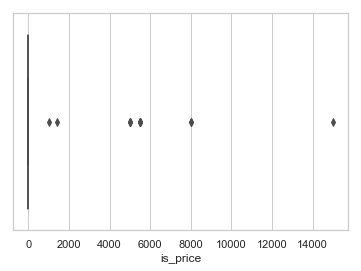

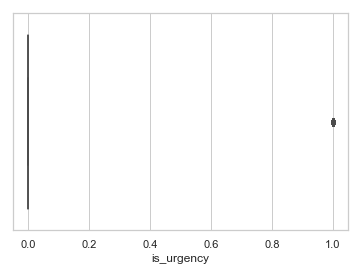

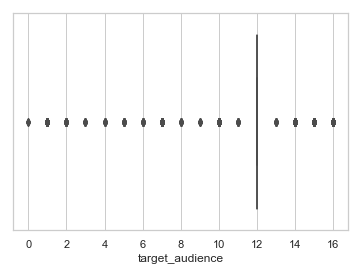

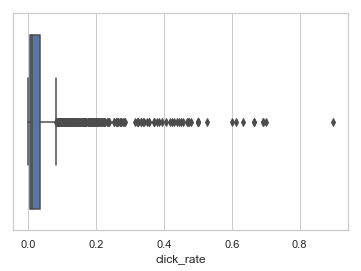

In [10]:
splot_cols=df_train.columns
for i in splot_cols:
    if df_train[i].dtype != 'object' and df_train[i].isnull().values.any() != True:
        sns.boxplot(df_train[i])
        plt.show()

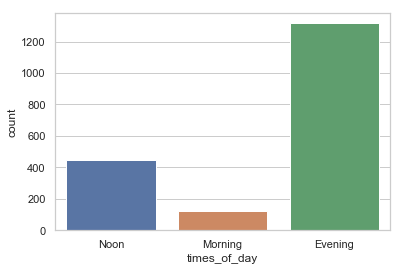

In [11]:
sns.countplot(df_train['times_of_day'])

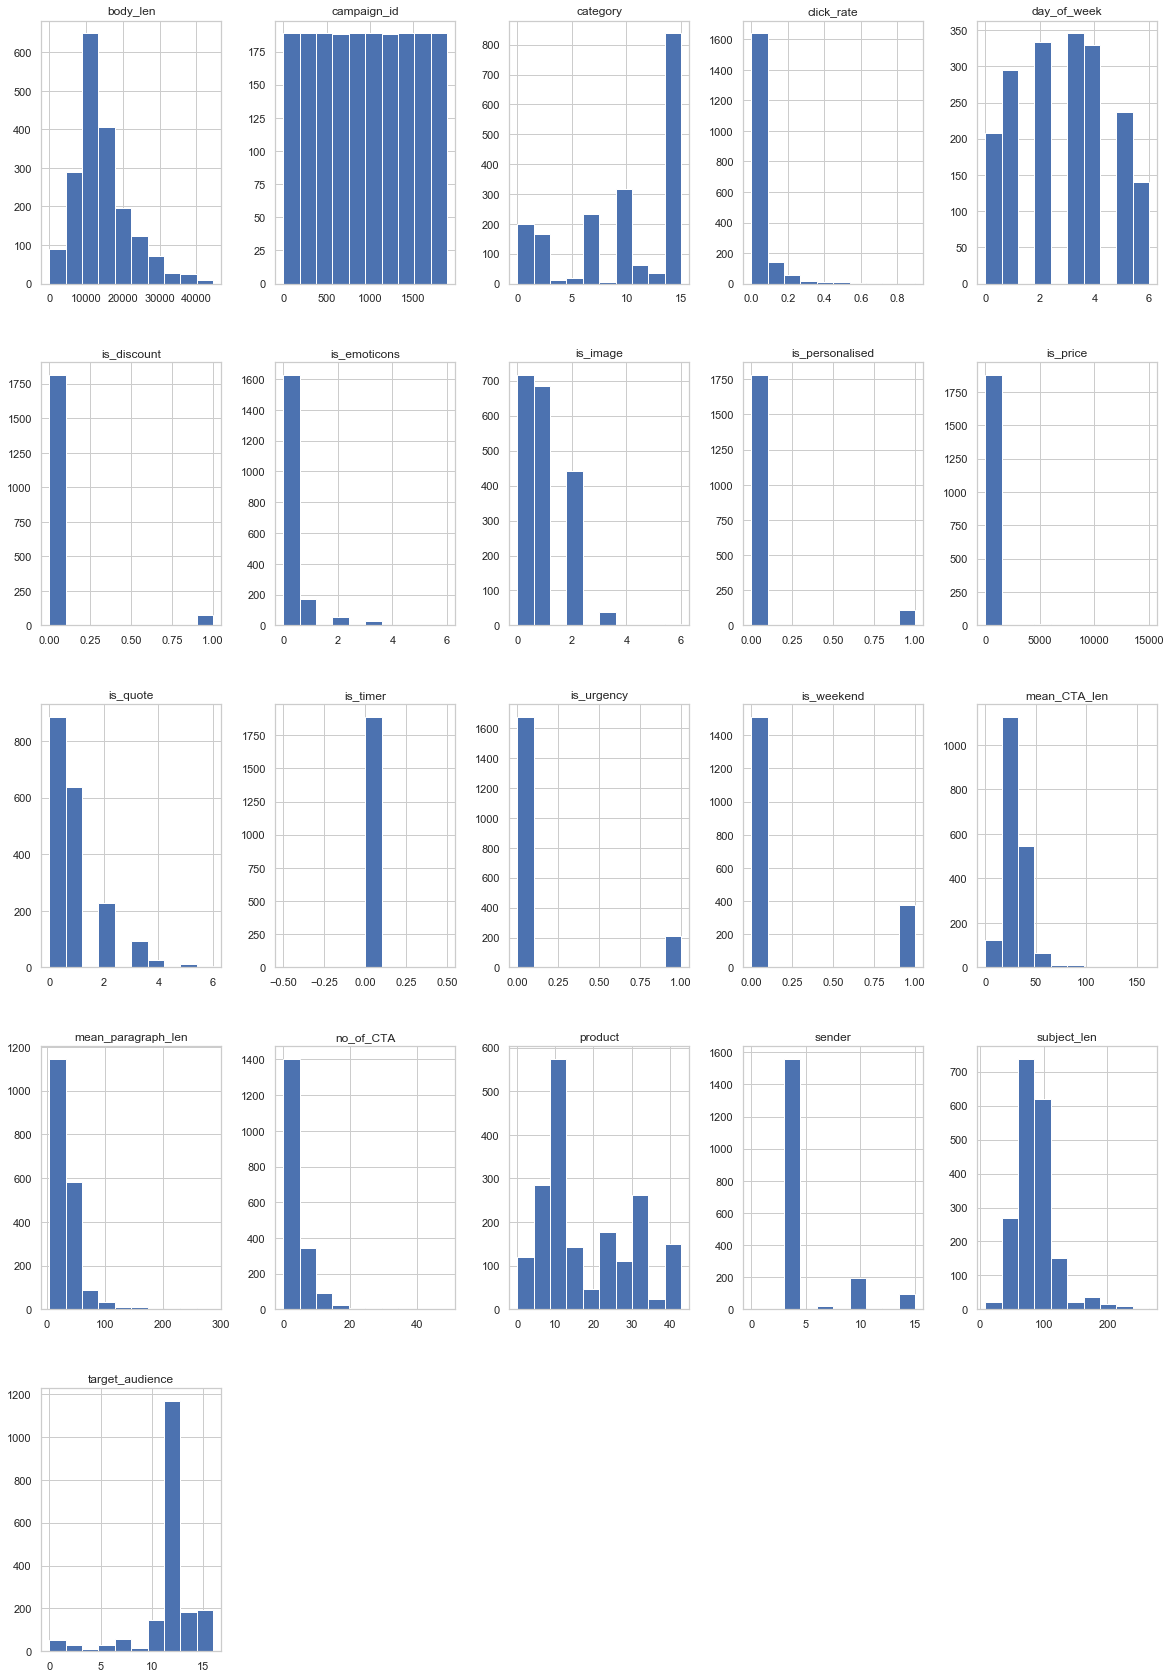

In [12]:
df_train.hist(figsize=(20,30));

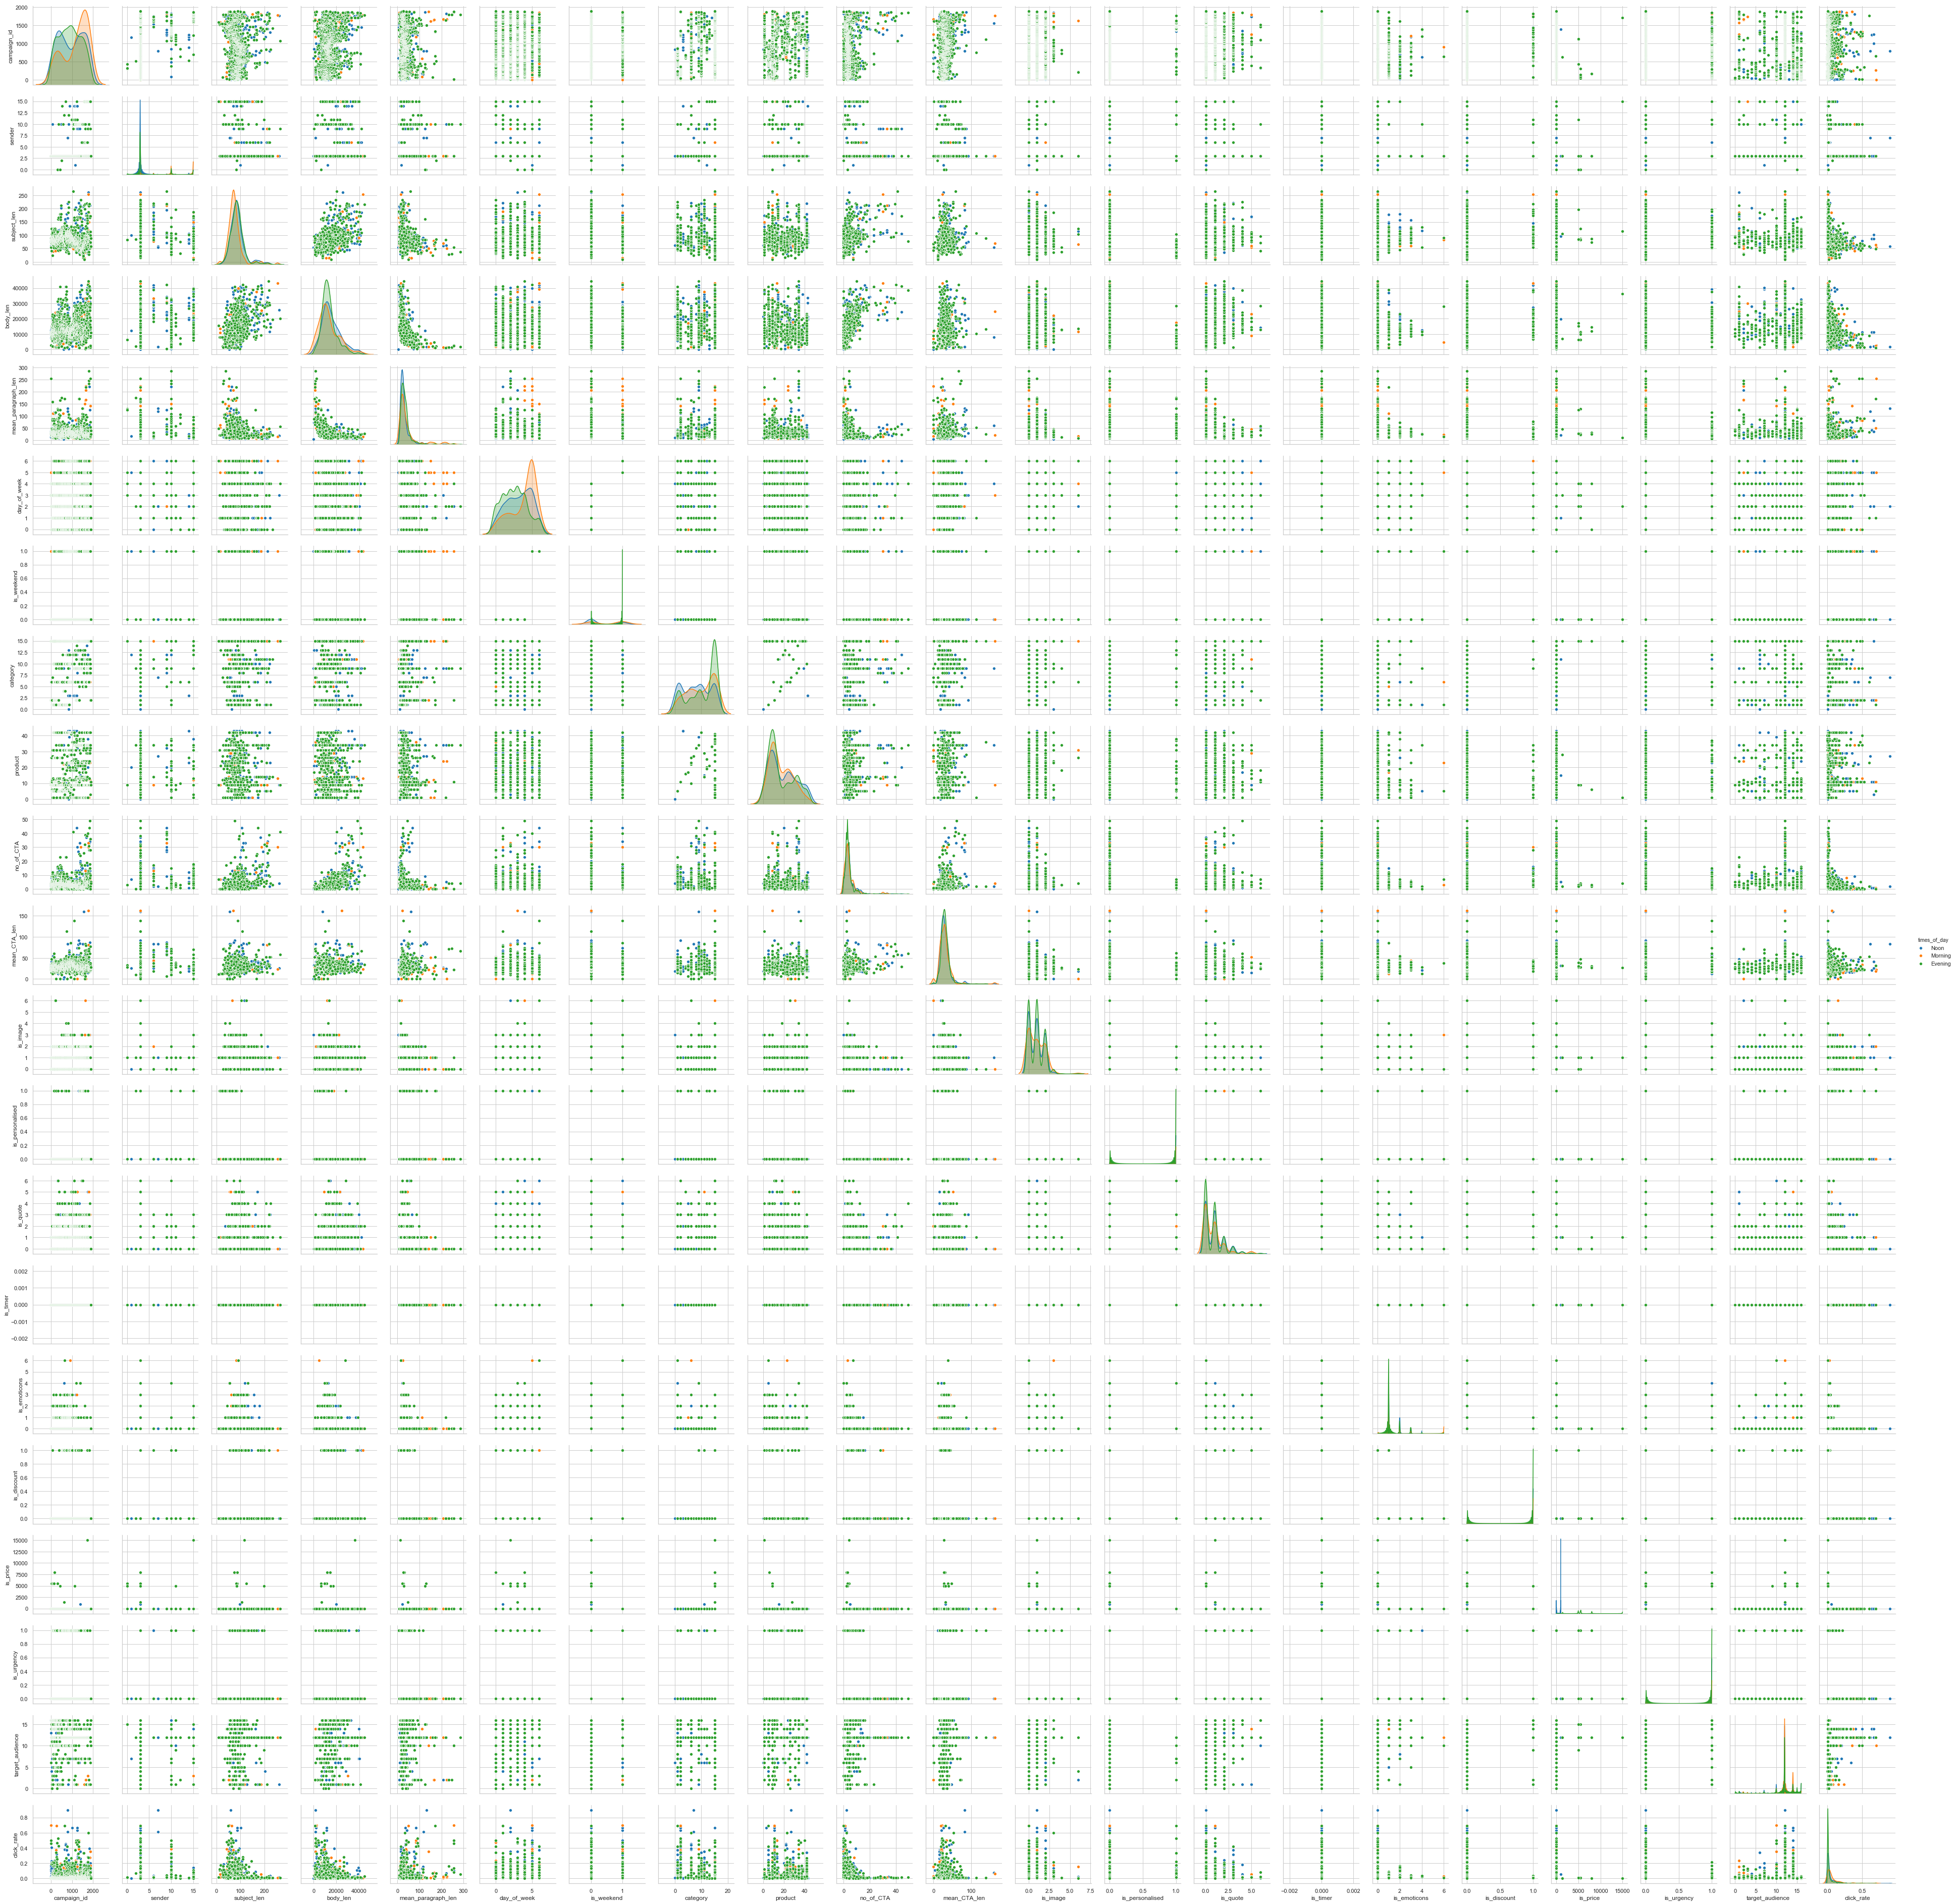

In [13]:
sns.pairplot(df_train,hue='times_of_day',diag_kind='kde',palette="tab10")

In [14]:
df_train.corr()

campaign_id    sender  subject_len  body_len  \
campaign_id            1.000000  0.443314    -0.052252  0.200128   
sender                 0.443314  1.000000    -0.102559  0.197929   
subject_len           -0.052252 -0.102559     1.000000  0.427326   
body_len               0.200128  0.197929     0.427326  1.000000   
mean_paragraph_len     0.028225  0.056891    -0.224770 -0.496146   
day_of_week            0.036410 -0.046928    -0.033574 -0.089146   
is_weekend             0.051932 -0.059499    -0.056666 -0.079255   
category               0.289416  0.188444     0.012601  0.026781   
product                0.209435  0.070689    -0.007108 -0.027747   
no_of_CTA              0.117558  0.100454     0.400213  0.559353   
mean_CTA_len           0.092375  0.016604     0.144261  0.083468   
is_image              -0.022799 -0.093244    -0.002214 -0.021254   
is_personalised        0.219755  0.147959    -0.293446 -0.220696   
is_quote              -0.006662  0.020928     0.120273  0.184035   
is_timer                    NaN       NaN          NaN       NaN   
is_emoticons          -0.128840 -0.105279     0.080303 -0.043931   
is_discount           -0.002232 -0.046900     0.125134  0.051123   
is_price              -0.041955  0.024099     0.033410  0.022431   
is_urgency            -0.058105 -0.071096     0.100584  0.023734   
target_audience       -0.104905 -0.132554    -0.021855 -0.075754   
click_rate             0.053315 -0.031398    -0.180143 -0.247866   

                    mean_paragraph_len  day_of_week  is_weekend  category  \
campaign_id                   0.028225     0.036410    0.051932  0.289416   
sender                        0.056891    -0.046928   -0.059499  0.188444   
subject_len                  -0.224770    -0.033574   -0.056666  0.012601   
body_len                     -0.496146    -0.089146   -0.079255  0.026781   
mean_paragraph_len            1.000000     0.003221   -0.012964  0.037475   
day_of_week                   0.003221     1.000000    0.720599 -0.058760   
is_weekend                   -0.012964     0.720599    1.000000 -0.063763   
category                      0.037475    -0.058760   -0.063763  1.000000   
product                      -0.054066     0.000249   -0.015759  0.007144   
no_of_CTA                    -0.170012    -0.037789   -0.033464 -0.023931   
mean_CTA_len                  0.064632    -0.003614   -0.032421  0.127554   
is_image                     -0.091250     0.019365    0.036626 -0.028794   
is_personalised               0.162480    -0.069705   -0.065130  0.132441   
is_quote                     -0.096086    -0.032476   -0.033968 -0.101411   
is_timer                           NaN          NaN         NaN       NaN   
is_emoticons                 -0.043173    -0.013571   -0.007504  0.100071   
is_discount                  -0.032096    -0.037122   -0.033757  0.166200   
is_price                      0.006765    -0.013822   -0.036255  0.068450   
is_urgency                   -0.037435     0.012735   -0.009789  0.189839   
target_audience              -0.110896     0.081693    0.046638 -0.026602   
click_rate                    0.178042     0.086372    0.114138 -0.167756   

                     product  no_of_CTA  mean_CTA_len  is_image  \
campaign_id         0.209435   0.117558      0.092375 -0.022799   
sender              0.070689   0.100454      0.016604 -0.093244   
subject_len        -0.007108   0.400213      0.144261 -0.002214   
body_len           -0.027747   0.559353      0.083468 -0.021254   
mean_paragraph_len -0.054066  -0.170012      0.064632 -0.091250   
day_of_week         0.000249  -0.037789     -0.003614  0.019365   
is_weekend         -0.015759  -0.033464     -0.032421  0.036626   
category            0.007144  -0.023931      0.127554 -0.028794   
product             1.000000   0.027486      0.043223  0.027952   
no_of_CTA           0.027486   1.000000      0.170387 -0.005971   
mean_CTA_len        0.043223   0.170387      1.000000 -0.021751   
is_image            0.02

In [15]:
df_train['is_timer'].value_counts()

0    1888
Name: is_timer, dtype: int64

In [16]:
copy_train = df_train.drop('is_timer',axis=1)
copy_train = copy_train.drop('campaign_id',axis=1)

copy_train.head()

sender  subject_len  body_len  mean_paragraph_len  day_of_week  is_weekend  \
0       3           76     10439                  39            5           1   
1       3           54      2570                 256            5           1   
2       3           59     12801                  16            5           1   
3       3           74     11037                  30            4           0   
4       3           80     10011                  27            5           1   

  times_of_day  category  product  no_of_CTA  mean_CTA_len  is_image  \
0         Noon         6       26          3            29         0   
1      Morning         2       11          0            22         0   
2         Noon         2       11          3            23         1   
3      Evening        15        9          4            24         0   
4         Noon         6       26          3            31         0   

   is_personalised  is_quote  is_emoticons  is_discount  is_price  is_urgency  \
0                0         0             0            0         0           0   
1                0         0             0            0         0           0   
2                0         1             0            0         0           0   
3                0         0             0            0         0           0   
4                0         1             0            0         0           0   

   target_audience  click_rate  
0               14    0.103079  
1               10    0.700000  
2               16    0.002769  
3               10    0.010868  
4               14    0.142826

In [17]:
copy_train.corr()

sender  subject_len  body_len  mean_paragraph_len  \
sender              1.000000    -0.102559  0.197929            0.056891   
subject_len        -0.102559     1.000000  0.427326           -0.224770   
body_len            0.197929     0.427326  1.000000           -0.496146   
mean_paragraph_len  0.056891    -0.224770 -0.496146            1.000000   
day_of_week        -0.046928    -0.033574 -0.089146            0.003221   
is_weekend         -0.059499    -0.056666 -0.079255           -0.012964   
category            0.188444     0.012601  0.026781            0.037475   
product             0.070689    -0.007108 -0.027747           -0.054066   
no_of_CTA           0.100454     0.400213  0.559353           -0.170012   
mean_CTA_len        0.016604     0.144261  0.083468            0.064632   
is_image           -0.093244    -0.002214 -0.021254           -0.091250   
is_personalised     0.147959    -0.293446 -0.220696            0.162480   
is_quote            0.020928     0.120273  0.184035           -0.096086   
is_emoticons       -0.105279     0.080303 -0.043931           -0.043173   
is_discount        -0.046900     0.125134  0.051123           -0.032096   
is_price            0.024099     0.033410  0.022431            0.006765   
is_urgency         -0.071096     0.100584  0.023734           -0.037435   
target_audience    -0.132554    -0.021855 -0.075754           -0.110896   
click_rate         -0.031398    -0.180143 -0.247866            0.178042   

                    day_of_week  is_weekend  category   product  no_of_CTA  \
sender                -0.046928   -0.059499  0.188444  0.070689   0.100454   
subject_len           -0.033574   -0.056666  0.012601 -0.007108   0.400213   
body_len              -0.089146   -0.079255  0.026781 -0.027747   0.559353   
mean_paragraph_len     0.003221   -0.012964  0.037475 -0.054066  -0.170012   
day_of_week            1.000000    0.720599 -0.058760  0.000249  -0.037789   
is_weekend             0.720599    1.000000 -0.063763 -0.015759  -0.033464   
category              -0.058760   -0.063763  1.000000  0.007144  -0.023931   
product                0.000249   -0.015759  0.007144  1.000000   0.027486   
no_of_CTA             -0.037789   -0.033464 -0.023931  0.027486   1.000000   
mean_CTA_len          -0.003614   -0.032421  0.127554  0.043223   0.170387   
is_image               0.019365    0.036626 -0.028794  0.027952  -0.005971   
is_personalised       -0.069705   -0.065130  0.132441  0.047566  -0.145453   
is_quote              -0.032476   -0.033968 -0.101411 -0.104653   0.092320   
is_emoticons          -0.013571   -0.007504  0.100071  0.013122  -0.037244   
is_discount           -0.037122   -0.033757  0.166200 -0.018291   0.041797   
is_price              -0.013822   -0.036255  0.068450 -0.060512  -0.015229   
is_urgency             0.012735   -0.009789  0.189839 -0.110753  -0.015649   
target_audience        0.081693    0.046638 -0.026602  0.058073  -0.007979   
click_rate             0.086372    0.114138 -0.167756  0.121602  -0.172637   

                    mean_CTA_len  is_image  is_personalised  is_quote  \
sender                  0.016604 -0.093244         0.147959  0.020928   
subject_len             0.144261 -0.002214        -0.293446  0.120273   
body_len                0.083468 -0.021254        -0.220696  0.184035   
mean_paragraph_len      0.064632 -0.091250         0.162480 -0.096086   
day_of_week            -0.003614  0.019365        -0.069705 -0.032476   
is_weekend             -0.032421  0.036626        -0.065130 -0.033968   
category                0.127554 -0.028794         0.132441 -0.101411   
product                 0.043223  0.027952         0.047566 -0.104653   
no_of_CTA               0.170387 -0.005971        -0.145453  0.092320   
mean_CTA_len            1.000000 -0.021751        -0.123560  0.023271   
is_image               -0.021751  1.000000         0.004322 -0.065771   
is_personalised        -0.123560  0.004322         1.000000 -0.018308   
is_quote   

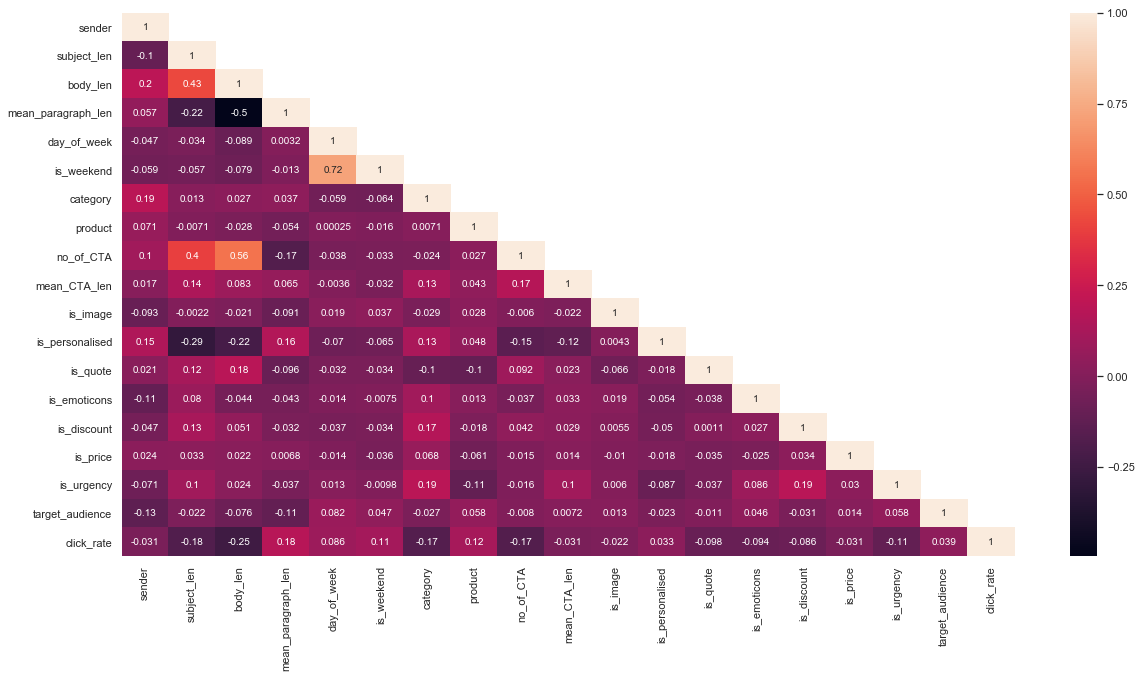

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(copy_train.corr(), annot=True,mask=np.triu(copy_train.corr(),+1))

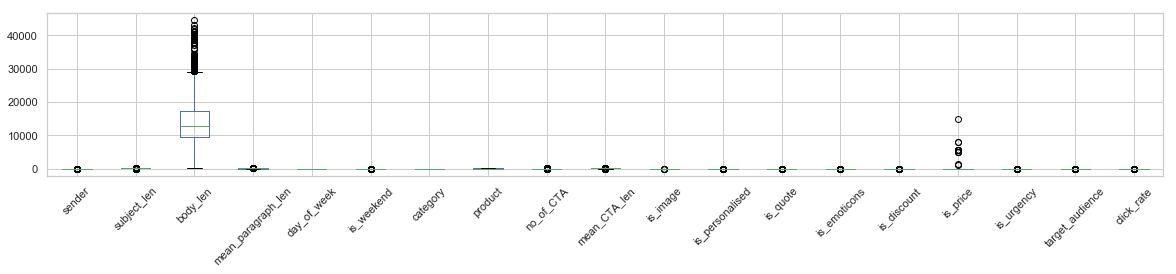

In [19]:
copy_train.boxplot(figsize=(20,3))
plt.xticks(rotation=45)
plt.show()

There is no null values present in the data. So, Treating of Null values is not required for the train dataset.

Outliers are present in the train dataset. SO, We need to perform the Outlier treatment.

In [20]:
df_cat_train = copy_train.select_dtypes(include = ['object'])
df_num_train = copy_train.select_dtypes(include = ['float64','int64'])
df_cat_train.head()

times_of_day
0         Noon
1      Morning
2         Noon
3      Evening
4         Noon

In [21]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df_cat_train['times_of_day']= label_encoder.fit_transform(df_cat_train['times_of_day'])

In [22]:
df_train_copy = pd.concat([df_cat_train,df_num_train],axis=1)
df_train_copy.head()

times_of_day  sender  subject_len  body_len  mean_paragraph_len  \
0             2       3           76     10439                  39   
1             1       3           54      2570                 256   
2             2       3           59     12801                  16   
3             0       3           74     11037                  30   
4             2       3           80     10011                  27   

   day_of_week  is_weekend  category  product  no_of_CTA  mean_CTA_len  \
0            5           1         6       26          3            29   
1            5           1         2       11          0            22   
2            5           1         2       11          3            23   
3            4           0        15        9          4            24   
4            5           1         6       26          3            31   

   is_image  is_personalised  is_quote  is_emoticons  is_discount  is_price  \
0         0                0         0             0            0         0   
1         0                0         0             0            0         0   
2         1                0         1             0            0         0   
3         0                0         0             0            0         0   
4         0                0         1             0            0         0   

   is_urgency  target_audience  click_rate  
0           0               14    0.103079  
1           0               10    0.700000  
2           0               16    0.002769  
3           0               10    0.010868  
4           0               14    0.142826

Shape before Outliers Treatment (1888, 20)


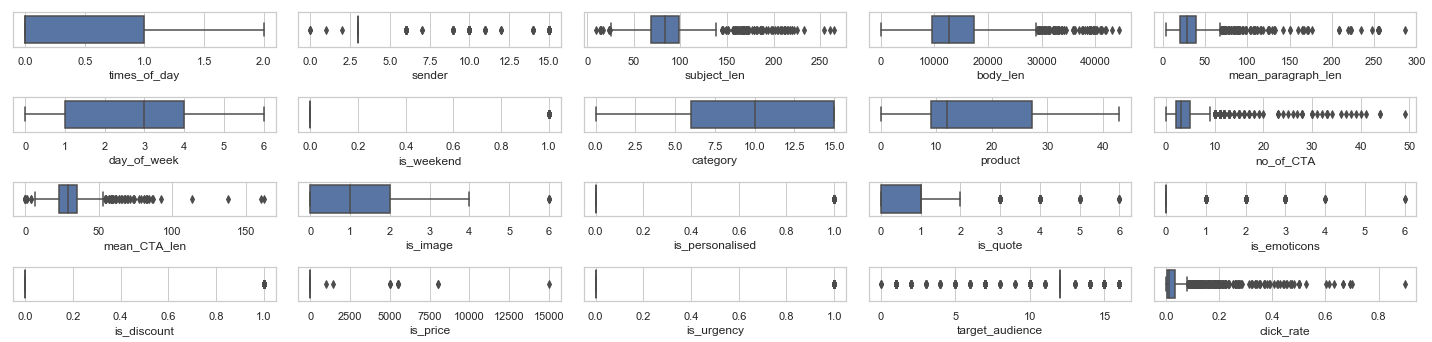

In [23]:
data_plot=df_train_copy
fig=plt.figure(figsize=(20,15));
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(13,5,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()
print('Shape before Outliers Treatment',df_train_copy.shape)

In [24]:
#Scale the data
# from scipy.stats import zscore
# df_train_scaled = df_train_copy.apply(zscore)
# df_train_scaled.head()
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# df_scaled = scaler.fit_transform(x.to_numpy())
# df_scaled = pd.DataFrame(df_scaled, columns=[x.columns])
# df_scaled.head()

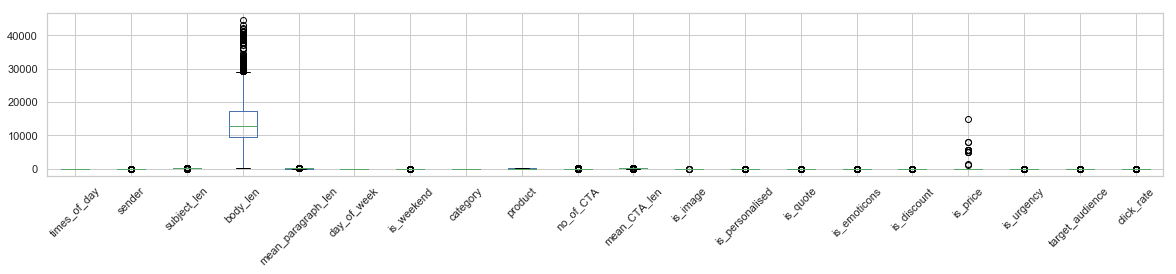

In [25]:
df_train_copy.boxplot(figsize=(20,3))
plt.xticks(rotation=45)
plt.show()

In [26]:
# data_plot=df_train_scaled
# fig=plt.figure(figsize=(20,15));
# for i in range(0,len(data_plot.columns)):
#     ax=fig.add_subplot(13,5,i+1)
#     sns.boxplot(data_plot[data_plot.columns[i]])
#     plt.tight_layout()
# print('Shape before Outliers Treatment',df_train_scaled.shape)

In [27]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [28]:
# for column in df_train_scaled.columns:
#     lr,ur=remove_outlier(df_train_scaled[column])
#     df_train_scaled[column]=np.where(df_train_scaled[column]>ur,ur,df_train_scaled[column])
#     df_train_scaled[column]=np.where(df_train_scaled[column]<lr,lr,df_train_scaled[column])

In [29]:
# data_plot=df_train_scaled
# fig=plt.figure(figsize=(20,15));
# for i in range(0,len(data_plot.columns)):
#     ax=fig.add_subplot(13,5,i+1)
#     sns.boxplot(data_plot[data_plot.columns[i]])
#     plt.tight_layout()
# print('Shape after Outliers Treatment',df_train_scaled.shape)

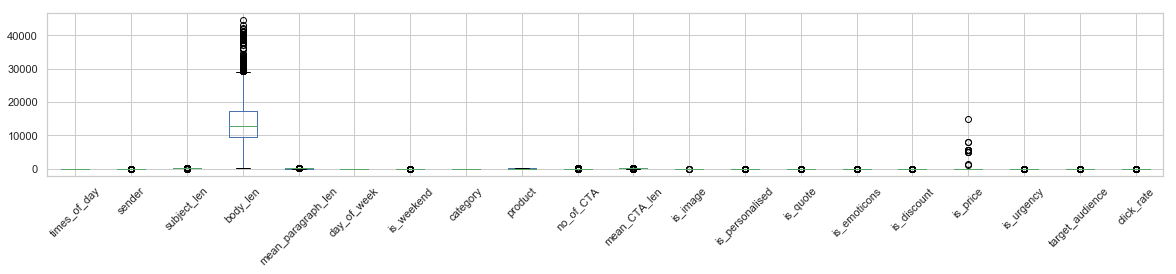

In [30]:
df_train_copy.boxplot(figsize=(20,3))
plt.xticks(rotation=45)
plt.show()

In [31]:
x = df_train_copy.drop('click_rate', axis=1)

y = df_train_copy['click_rate']
y.head()

0    0.103079
1    0.700000
2    0.002769
3    0.010868
4    0.142826
Name: click_rate, dtype: float64

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4 , random_state=42)
x_train.shape

(1132, 19)

In [33]:
x_test.shape

(756, 19)

In [34]:
y_train.shape

(1132,)

In [35]:
y_test.shape

(756,)

In [36]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression(n_jobs=-1)
LR_model.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [37]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, LR_model.coef_[0]))

The coefficient for times_of_day is 0.011781853841993274
The coefficient for sender is 0.011781853841993274
The coefficient for subject_len is 0.011781853841993274
The coefficient for body_len is 0.011781853841993274
The coefficient for mean_paragraph_len is 0.011781853841993274
The coefficient for day_of_week is 0.011781853841993274
The coefficient for is_weekend is 0.011781853841993274
The coefficient for category is 0.011781853841993274
The coefficient for product is 0.011781853841993274
The coefficient for no_of_CTA is 0.011781853841993274
The coefficient for mean_CTA_len is 0.011781853841993274
The coefficient for is_image is 0.011781853841993274
The coefficient for is_personalised is 0.011781853841993274
The coefficient for is_quote is 0.011781853841993274
The coefficient for is_emoticons is 0.011781853841993274
The coefficient for is_discount is 0.011781853841993274
The coefficient for is_price is 0.011781853841993274
The coefficient for is_urgency is 0.011781853841993274
The co

In [38]:
LR_intercept = LR_model.intercept_

print("The intercept for our model is {}".format(LR_intercept))

The intercept for our model is 0.07559335808870728


In [39]:
# R square on training data
print("R square value for training data ",LR_model.score(x_train, y_train))
# R square on testing data
print("R square value for testing data ",LR_model.score(x_test, y_test))
LR_model_Rsquare_value = LR_model.score(x_test, y_test)
LR_model_Rsquare_value_train = LR_model.score(x_train, y_train)

R square value for training data  0.1562921678859689
R square value for testing data  0.11274445867740623


In [40]:
#RMSE on Training data
LR_predicted_train=LR_model.fit(x_train, y_train).predict(x_train)
print("Mean squared error for the training data is ",(metrics.mean_squared_error(y_train,LR_predicted_train)))
print("Root Mean squared error for the training data is ",np.sqrt(metrics.mean_squared_error(y_train,LR_predicted_train)))


#RMSE on Testing data
LR_predicted_test=LR_model.fit(x_train, y_train).predict(x_test)
print("Mean squared error for the testing data is ",(metrics.mean_squared_error(y_test,LR_predicted_test)))
print("Root Mean squared error for the testing data is ",np.sqrt(metrics.mean_squared_error(y_test,LR_predicted_test)))


LR_model_MSE = metrics.mean_squared_error(y_test,LR_predicted_test)
LR_model_RMSE = np.sqrt(metrics.mean_squared_error(y_test,LR_predicted_test))

Mean squared error for the training data is  0.006628682286402028
Root Mean squared error for the training data is  0.08141671994376848
Mean squared error for the testing data is  0.005259283173153345
Root Mean squared error for the testing data is  0.0725209154186111


In [41]:
# Mean Absolute Error training data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, LR_predicted_train))
# Mean Absolute Error training data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, LR_predicted_test))

LR_model_MAE_score = metrics.mean_absolute_error(y_test, LR_predicted_test)

Mean Absolute Error: 0.04754589710896358
Mean Absolute Error: 0.045074835497503546


In [42]:
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, LR_predicted_test))

LR_model_MAPE_score = metrics.mean_absolute_percentage_error(y_test, LR_predicted_test)

Mean Absolute Percentage Error: 6922927109895.415


In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(x.values, ix) for ix in range(x.shape[1])] 
def vif_calculation(x):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variable"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

    return(vif)
vif_calculation(x).sort_values(by = 'VIF', ascending = False)

variable        VIF
2          subject_len  11.649759
18     target_audience  11.041174
3             body_len   9.806454
10        mean_CTA_len   7.813405
5          day_of_week   7.226403
7             category   5.348088
1               sender   3.387621
4   mean_paragraph_len   3.138732
8              product   3.115240
9            no_of_CTA   2.808794
6           is_weekend   2.658681
11            is_image   2.063798
13            is_quote   1.762917
0         times_of_day   1.562899
17          is_urgency   1.257478
12     is_personalised   1.241762
14        is_emoticons   1.172490
15         is_discount   1.121097
16            is_price   1.022311

### Dropping the variables which is having the variance Inflation Factor greater than 10.

In [44]:
x.columns

Index(['times_of_day', 'sender', 'subject_len', 'body_len',
       'mean_paragraph_len', 'day_of_week', 'is_weekend', 'category',
       'product', 'no_of_CTA', 'mean_CTA_len', 'is_image', 'is_personalised',
       'is_quote', 'is_emoticons', 'is_discount', 'is_price', 'is_urgency',
       'target_audience'],
      dtype='object')

In [45]:
x = x.drop('subject_len', axis=1)

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(x.values, ix) for ix in range(x.shape[1])] 
def vif_calculation(x):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variable"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

    return(vif)
vif_calculation(x).sort_values(by = 'VIF', ascending = False)

variable        VIF
17     target_audience  10.383907
2             body_len   8.377093
9         mean_CTA_len   7.639749
4          day_of_week   7.141817
6             category   5.295160
1               sender   3.329606
7              product   3.087760
3   mean_paragraph_len   3.052096
8            no_of_CTA   2.748419
5           is_weekend   2.643913
10            is_image   2.052229
12            is_quote   1.743816
0         times_of_day   1.562696
16          is_urgency   1.255255
11     is_personalised   1.216442
13        is_emoticons   1.162137
14         is_discount   1.113945
15            is_price   1.021628

In [47]:
x = x.drop('target_audience', axis=1)

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(x.values, ix) for ix in range(x.shape[1])] 
def vif_calculation(x):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variable"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

    return(vif)
vif_calculation(x).sort_values(by = 'VIF', ascending = False)

variable       VIF
2             body_len  7.835429
9         mean_CTA_len  7.178231
4          day_of_week  6.583652
6             category  5.158953
1               sender  3.322816
3   mean_paragraph_len  2.920033
7              product  2.919342
8            no_of_CTA  2.738658
5           is_weekend  2.618163
10            is_image  1.994092
12            is_quote  1.721469
0         times_of_day  1.561612
16          is_urgency  1.251354
11     is_personalised  1.211085
13        is_emoticons  1.156080
14         is_discount  1.112212
15            is_price  1.021228

In [49]:
resultsDf = pd.DataFrame({'intercept':LR_intercept,'Rsquare value train':LR_model_Rsquare_value_train,'R Square value':LR_model_Rsquare_value,'RMSE':LR_model_RMSE,'MAE':LR_model_MAE_score,'MAPE':LR_model_MAPE_score,"MSE":LR_model_MSE},index=['Linear Regression'])
resultsDf

intercept  Rsquare value train  R Square value      RMSE  \
Linear Regression   0.075593             0.156292        0.112744  0.072521   

                        MAE          MAPE       MSE  
Linear Regression  0.045075  6.922927e+12  0.005259

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4 , random_state=42)
x_train.shape

(1132, 17)

### Ridge Regression

In [51]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1.0, fit_intercept=True, normalize=False, max_iter=100, tol=0.01, solver='auto')
ridge_reg.fit(x_train, y_train)

Ridge(max_iter=100, normalize=False, tol=0.01)

In [52]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, ridge_reg.coef_[0]))

The coefficient for times_of_day is 0.01163031250041449
The coefficient for sender is 0.01163031250041449
The coefficient for body_len is 0.01163031250041449
The coefficient for mean_paragraph_len is 0.01163031250041449
The coefficient for day_of_week is 0.01163031250041449
The coefficient for is_weekend is 0.01163031250041449
The coefficient for category is 0.01163031250041449
The coefficient for product is 0.01163031250041449
The coefficient for no_of_CTA is 0.01163031250041449
The coefficient for mean_CTA_len is 0.01163031250041449
The coefficient for is_image is 0.01163031250041449
The coefficient for is_personalised is 0.01163031250041449
The coefficient for is_quote is 0.01163031250041449
The coefficient for is_emoticons is 0.01163031250041449
The coefficient for is_discount is 0.01163031250041449
The coefficient for is_price is 0.01163031250041449
The coefficient for is_urgency is 0.01163031250041449


In [53]:
ridge_reg_intercept = ridge_reg.intercept_

print("The intercept for our model is {}".format(ridge_reg_intercept))

The intercept for our model is 0.07564164544371671


In [54]:
# R square on training data
print("R square value for training data ",ridge_reg.score(x_train, y_train))
# R square on testing data
print("R square value for testing data ",ridge_reg.score(x_test, y_test))
ridge_reg_model_Rsquare_value_train = ridge_reg.score(x_train, y_train)
ridge_reg_model_Rsquare_value = ridge_reg.score(x_test, y_test)

R square value for training data  0.15133237002267652
R square value for testing data  0.11478217996601237


In [55]:
#RMSE on Training data
ridge_reg_predicted_train=ridge_reg.fit(x_train, y_train).predict(x_train)
print("Mean squared error for the training data is ",(metrics.mean_squared_error(y_train,ridge_reg_predicted_train)))
print("Root Mean squared error for the training data is ",np.sqrt(metrics.mean_squared_error(y_train,ridge_reg_predicted_train)))

#RMSE on Testing data
ridge_reg_predicted_test=ridge_reg.fit(x_train, y_train).predict(x_test)
print("Mean squared error for the testing data is ",(metrics.mean_squared_error(y_test,ridge_reg_predicted_test)))
print("Root Mean squared error for the testing data is ",np.sqrt(metrics.mean_squared_error(y_test,ridge_reg_predicted_test)))

ridge_reg_model_MSE= (metrics.mean_squared_error(y_test,ridge_reg_predicted_test))
ridge_reg_model_RMSE= np.sqrt(metrics.mean_squared_error(y_test,ridge_reg_predicted_test))

Mean squared error for the training data is  0.0066676494774000825
Root Mean squared error for the training data is  0.08165567633300261
Mean squared error for the testing data is  0.005247204405779553
Root Mean squared error for the testing data is  0.0724375897292252


In [56]:
# Mean Absolute Error training data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, ridge_reg_predicted_train))
# Mean Absolute Error training data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ridge_reg_predicted_test))

ridge_reg_model_MAE_score = metrics.mean_absolute_error(y_test, ridge_reg_predicted_test)

Mean Absolute Error: 0.04751369807243937
Mean Absolute Error: 0.04481953261769005


In [57]:
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, ridge_reg_predicted_test))

ridge_reg_model_MAPE_score = metrics.mean_absolute_percentage_error(y_test, ridge_reg_predicted_test)

Mean Absolute Percentage Error: 6841938164635.44


In [58]:
# accuracy for test scaled data
ridge_reg_accuracy = (1 - (ridge_reg_model_RMSE/y.mean()))
ridge_reg_accuracy

-0.7293339806023169

In [59]:
resultsDf1 = pd.DataFrame({'intercept':ridge_reg_intercept,'R Square value train':ridge_reg_model_Rsquare_value_train,'R Square value':ridge_reg_model_Rsquare_value,'RMSE':ridge_reg_model_RMSE,'MSE':ridge_reg_model_MSE,'MAE':ridge_reg_model_MAE_score,'MAPE':ridge_reg_model_MAPE_score},index=['Ridge Regression'])
resultsDf = pd.concat([resultsDf1,resultsDf])
resultsDf

MAE          MAPE       MSE  R Square value  \
Ridge Regression   0.044820  6.841938e+12  0.005247        0.114782   
Linear Regression  0.045075  6.922927e+12  0.005259        0.112744   

                   R Square value train      RMSE  Rsquare value train  \
Ridge Regression               0.151332  0.072438                  NaN   
Linear Regression                   NaN  0.072521             0.156292   

                   intercept  
Ridge Regression    0.075642  
Linear Regression   0.075593

### Random Forest regressor

In [60]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(x_train,y_train)

RandomForestRegressor()

In [61]:
# R square on training data
print("R square value for training data ",rf_model.score(x_train, y_train))
# R square on testing data
print("R square value for testing data ",rf_model.score(x_test, y_test))
rf_model_Rsquare_value_train = rf_model.score(x_train, y_train)
rf_model_Rsquare_value = rf_model.score(x_test, y_test)

R square value for training data  0.9200809946932668
R square value for testing data  0.3485667207479506


In [62]:
#RMSE on Training data
rf_model_predicted_train=rf_model.fit(x_train, y_train).predict(x_train)
print("Mean squared error for the training data is ",(metrics.mean_squared_error(y_train,rf_model_predicted_train)))
print("Root Mean squared error for the training data is ",np.sqrt(metrics.mean_squared_error(y_train,rf_model_predicted_train)))

#RMSE on Testing data
rf_model_predicted_test=rf_model.fit(x_train, y_train).predict(x_test)
print("Mean squared error for the testing data is ",(metrics.mean_squared_error(y_test,rf_model_predicted_test)))
print("Root Mean squared error for the testing data is ",np.sqrt(metrics.mean_squared_error(y_test,rf_model_predicted_test)))

rf_model_MSE= (metrics.mean_squared_error(y_test,rf_model_predicted_test))
rf_model_RMSE= np.sqrt(metrics.mean_squared_error(y_test,rf_model_predicted_test))

Mean squared error for the training data is  0.0005890488525563436
Root Mean squared error for the training data is  0.02427032864541277
Mean squared error for the testing data is  0.003773509545649759
Root Mean squared error for the testing data is  0.06142889829428621


In [63]:
# Mean Absolute Error training data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, rf_model_predicted_train))
# Mean Absolute Error training data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rf_model_predicted_test))

rf_model_MAE_score = metrics.mean_absolute_error(y_test, rf_model_predicted_test)

Mean Absolute Error: 0.012112049381663919
Mean Absolute Error: 0.032296709007147456


In [64]:
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, rf_model_predicted_test))

rf_model_MAPE_score = metrics.mean_absolute_percentage_error(y_test, rf_model_predicted_test)

Mean Absolute Percentage Error: 6563289003856.68


In [65]:
# accuracy for test scaled data
rf_model_accuracy = (1 - (rf_model_RMSE/y.mean()))
rf_model_accuracy

-0.46651871781445453

In [66]:
resultsDf1 = pd.DataFrame({'intercept':"Nan",'R Square value train':rf_model_Rsquare_value_train,'R Square value':rf_model_Rsquare_value,'RMSE':rf_model_RMSE,'MSE':rf_model_MSE,'MAE':rf_model_MAE_score,'MAPE':rf_model_MAPE_score},index=['RF Model'])
resultsDf = pd.concat([resultsDf1,resultsDf])
resultsDf

MAE          MAPE       MSE  R Square value  \
RF Model           0.032297  6.563289e+12  0.003774        0.348567   
Ridge Regression   0.044820  6.841938e+12  0.005247        0.114782   
Linear Regression  0.045075  6.922927e+12  0.005259        0.112744   

                   R Square value train      RMSE  Rsquare value train  \
RF Model                       0.920081  0.061429                  NaN   
Ridge Regression               0.151332  0.072438                  NaN   
Linear Regression                   NaN  0.072521             0.156292   

                   intercept  
RF Model                 Nan  
Ridge Regression   0.0756416  
Linear Regression  0.0755934

### Adaboost Regressor

In [67]:
from sklearn.ensemble import AdaBoostRegressor
AdaBoost_model = AdaBoostRegressor()
AdaBoost_model.fit(x_train, y_train)

AdaBoostRegressor()

In [68]:
# R square on training data
print("R square value for training data ",AdaBoost_model.score(x_train, y_train))
# R square on testing data
print("R square value for testing data ",AdaBoost_model.score(x_test, y_test))
AdaBoost_model_Rsquare_value_train = AdaBoost_model.score(x_train, y_train)
AdaBoost_model_Rsquare_value = AdaBoost_model.score(x_test, y_test)

R square value for training data  0.33876183977424157
R square value for testing data  -0.02051959841966622


In [69]:
#RMSE on Training data
AdaBoost_model_predicted_train=AdaBoost_model.fit(x_train, y_train).predict(x_train)
print("Mean squared error for the training data is ",(metrics.mean_squared_error(y_train,AdaBoost_model_predicted_train)))
print("Root Mean squared error for the training data is ",np.sqrt(metrics.mean_squared_error(y_train,AdaBoost_model_predicted_train)))

#RMSE on Testing data
AdaBoost_model_predicted_test=AdaBoost_model.fit(x_train, y_train).predict(x_test)
print("Mean squared error for the testing data is ",(metrics.mean_squared_error(y_test,AdaBoost_model_predicted_test)))
print("Root Mean squared error for the testing data is ",np.sqrt(metrics.mean_squared_error(y_test,AdaBoost_model_predicted_test)))

AdaBoost_model_MSE= (metrics.mean_squared_error(y_test,AdaBoost_model_predicted_test))
AdaBoost_model_RMSE= np.sqrt(metrics.mean_squared_error(y_test,AdaBoost_model_predicted_test))

Mean squared error for the training data is  0.005117224072980161
Root Mean squared error for the training data is  0.07153477527035478
Mean squared error for the testing data is  0.007798280572578184
Root Mean squared error for the testing data is  0.08830787378585322


In [70]:
# Mean Absolute Error training data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, AdaBoost_model_predicted_train))
# Mean Absolute Error training data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, AdaBoost_model_predicted_test))

AdaBoost_model_MAE_score = metrics.mean_absolute_error(y_test, AdaBoost_model_predicted_test)

Mean Absolute Error: 0.050996719075651134
Mean Absolute Error: 0.07088762067624035


In [71]:
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, AdaBoost_model_predicted_test))

AdaBoost_model_MAPE_score = metrics.mean_absolute_percentage_error(y_test,AdaBoost_model_predicted_test)

Mean Absolute Percentage Error: 15879881831751.895


In [72]:
# accuracy for test scaled data
AdaBoost_model_accuracy = (1 - (AdaBoost_model_RMSE/y.mean()))
AdaBoost_model_accuracy

-1.108212151501275

In [73]:
resultsDf1 = pd.DataFrame({'intercept':"Nan",'R Square value train':AdaBoost_model_Rsquare_value_train,'R Square value':AdaBoost_model_Rsquare_value,'RMSE':AdaBoost_model_RMSE,'MSE':AdaBoost_model_MSE,'MAE':AdaBoost_model_MAE_score,'MAPE':AdaBoost_model_MAPE_score},index=['AdaBoost Regression model'])
resultsDf = pd.concat([resultsDf1,resultsDf])
resultsDf

MAE          MAPE       MSE  R Square value  \
AdaBoost Regression model  0.070888  1.587988e+13  0.007798       -0.020520   
RF Model                   0.032297  6.563289e+12  0.003774        0.348567   
Ridge Regression           0.044820  6.841938e+12  0.005247        0.114782   
Linear Regression          0.045075  6.922927e+12  0.005259        0.112744   

                           R Square value train      RMSE  \
AdaBoost Regression model              0.338762  0.088308   
RF Model                               0.920081  0.061429   
Ridge Regression                       0.151332  0.072438   
Linear Regression                           NaN  0.072521   

                           Rsquare value train  intercept  
AdaBoost Regression model                  NaN        Nan  
RF Model                                   NaN        Nan  
Ridge Regression                           NaN  0.0756416  
Linear Regression                     0.156292  0.0755934

### KNN Regressor

In [74]:
from sklearn.neighbors import KNeighborsRegressor
KNN_reg = KNeighborsRegressor(n_jobs=-1)
KNN_reg.fit(x_train, y_train)

KNeighborsRegressor(n_jobs=-1)

In [75]:
# R square on training data
print("R square value for training data ",KNN_reg.score(x_train, y_train))
# R square on testing data
print("R square value for testing data ",KNN_reg.score(x_test, y_test))
KNN_reg_Rsquare_value_train = KNN_reg.score(x_train, y_train)
KNN_reg_Rsquare_value = KNN_reg.score(x_test, y_test)

R square value for training data  0.4752471106734345
R square value for testing data  0.12009021505139039


In [76]:
#RMSE on Training data
KNN_reg_predicted_train=KNN_reg.fit(x_train, y_train).predict(x_train)
print("Mean squared error for the training data is ",(metrics.mean_squared_error(y_train,KNN_reg_predicted_train)))
print("Root Mean squared error for the training data is ",np.sqrt(metrics.mean_squared_error(y_train,KNN_reg_predicted_train)))

#RMSE on Testing data
KNN_reg_predicted_test=AdaBoost_model.fit(x_train, y_train).predict(x_test)
print("Mean squared error for the testing data is ",(metrics.mean_squared_error(y_test,KNN_reg_predicted_test)))
print("Root Mean squared error for the testing data is ",np.sqrt(metrics.mean_squared_error(y_test,KNN_reg_predicted_test)))

KNN_reg_MSE= (metrics.mean_squared_error(y_test,KNN_reg_predicted_test))
KNN_reg_RMSE= np.sqrt(metrics.mean_squared_error(y_test,KNN_reg_predicted_test))

Mean squared error for the training data is  0.004122778110879459
Root Mean squared error for the training data is  0.06420886318008955
Mean squared error for the testing data is  0.006189716570917144
Root Mean squared error for the testing data is  0.07867475180079785


In [77]:
# Mean Absolute Error training data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, KNN_reg_predicted_train))
# Mean Absolute Error training data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, KNN_reg_predicted_test))

KNN_reg_MAE_score = metrics.mean_absolute_error(y_test, KNN_reg_predicted_test)

Mean Absolute Error: 0.03424751259075044
Mean Absolute Error: 0.05561328810154404


In [78]:
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, KNN_reg_predicted_test))

KNN_reg_MAPE_score = metrics.mean_absolute_percentage_error(y_test,KNN_reg_predicted_test)

Mean Absolute Percentage Error: 12383024057744.113


In [79]:
# accuracy for test scaled data
KNN_reg_accuracy = (1 - (KNN_reg_RMSE/y.mean()))
KNN_reg_accuracy

-0.8782364544865742

In [80]:
resultsDf1 = pd.DataFrame({'intercept':"Nan",'R Square value train':KNN_reg_Rsquare_value_train,'R Square value':KNN_reg_Rsquare_value,'RMSE':KNN_reg_RMSE,'MSE':KNN_reg_MSE,'MAE':KNN_reg_MAE_score,'MAPE':KNN_reg_MAPE_score},index=['KNN Regression model'])
resultsDf = pd.concat([resultsDf1,resultsDf])
resultsDf

MAE          MAPE       MSE  R Square value  \
KNN Regression model       0.055613  1.238302e+13  0.006190        0.120090   
AdaBoost Regression model  0.070888  1.587988e+13  0.007798       -0.020520   
RF Model                   0.032297  6.563289e+12  0.003774        0.348567   
Ridge Regression           0.044820  6.841938e+12  0.005247        0.114782   
Linear Regression          0.045075  6.922927e+12  0.005259        0.112744   

                           R Square value train      RMSE  \
KNN Regression model                   0.475247  0.078675   
AdaBoost Regression model              0.338762  0.088308   
RF Model                               0.920081  0.061429   
Ridge Regression                       0.151332  0.072438   
Linear Regression                           NaN  0.072521   

                           Rsquare value train  intercept  
KNN Regression model                       NaN        Nan  
AdaBoost Regression model                  NaN        Nan  
RF Model                                   NaN        Nan  
Ridge Regression                           NaN  0.0756416  
Linear Regression                     0.156292  0.0755934

### Random Forest with grid search

In [81]:
rf_gridsearch = {'max_depth': [20, 40, 60, 80, 100, 120],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [150, 200, 250],
                'random_state':[42,1024]}

In [82]:
from sklearn.model_selection import RandomizedSearchCV
rf_model2 = RandomForestRegressor()
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
# rf_model_grid = RandomizedSearchCV(estimator = rf_model2, param_distributions = rf_gridsearch, n_iter = 1000, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_model_grid = GridSearchCV(estimator = rf_model2, param_grid = rf_gridsearch, cv = 5, verbose=2, n_jobs = -1)

# Fit the random search model
rf_model_grid

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [20, 40, 60, 80, 100, 120],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [150, 200, 250],
                         'random_state': [42, 1024]},
             verbose=2)

In [83]:
rf_model_grid.fit(x_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [20, 40, 60, 80, 100, 120],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [150, 200, 250],
                         'random_state': [42, 1024]},
             verbose=2)

In [84]:
rf_model_grid.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 250,
 'random_state': 1024}

In [85]:
rf_best_model = rf_model_grid.best_estimator_
rf_best_model

RandomForestRegressor(max_depth=20, min_samples_leaf=2, n_estimators=250,
                      random_state=1024)

In [86]:
# R square on training data
print("R square value for training data ",rf_best_model.score(x_train, y_train))
# R square on testing data
print("R square value for testing data ",rf_best_model.score(x_test, y_test))
rf_best_model_Rsquare_value_train = rf_best_model.score(x_train, y_train)
rf_best_model_Rsquare_value = rf_best_model.score(x_test, y_test)

R square value for training data  0.8539085341610355
R square value for testing data  0.33753398865617723


In [87]:
#RMSE on Training data
rf_best_model_predicted_train=rf_best_model.fit(x_train, y_train).predict(x_train)
print("Mean squared error for the training data is ",(metrics.mean_squared_error(y_train,rf_best_model_predicted_train)))
print("Root Mean squared error for the training data is ",np.sqrt(metrics.mean_squared_error(y_train,rf_best_model_predicted_train)))

#RMSE on Testing data
rf_best_model_predicted_test=rf_best_model.fit(x_train, y_train).predict(x_test)
print("Mean squared error for the testing data is ",(metrics.mean_squared_error(y_test,rf_best_model_predicted_test)))
print("Root Mean squared error for the testing data is ",np.sqrt(metrics.mean_squared_error(y_test,rf_best_model_predicted_test)))

rf_best_model_MSE= (metrics.mean_squared_error(y_test,rf_best_model_predicted_test))
rf_best_model_RMSE= np.sqrt(metrics.mean_squared_error(y_test,rf_best_model_predicted_test))

Mean squared error for the training data is  0.0011477834801827084
Root Mean squared error for the training data is  0.03387895335134644
Mean squared error for the testing data is  0.00392682399148839
Root Mean squared error for the testing data is  0.06266437577673929


In [88]:
# Mean Absolute Error training data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, rf_best_model_predicted_train))
# Mean Absolute Error training data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rf_best_model_predicted_test))

rf_best_model_MAE_score = metrics.mean_absolute_error(y_test, rf_best_model_predicted_test)

Mean Absolute Error: 0.016401817310882527
Mean Absolute Error: 0.03219826524637943


In [89]:
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, rf_best_model_predicted_test))

rf_best_model_MAPE_score = metrics.mean_absolute_percentage_error(y_test, rf_best_model_predicted_test)

Mean Absolute Percentage Error: 6232619022491.889


In [90]:
# accuracy for test scaled data
rf_best_model_accuracy = (1 - (rf_best_model_RMSE/y.mean()))
rf_best_model_accuracy

-0.49601380732062994

In [91]:
resultsDf1 = pd.DataFrame({'intercept':"Nan",'R Square value train':rf_best_model_Rsquare_value_train,'R Square value':rf_best_model_Rsquare_value,'RMSE':rf_best_model_RMSE,'MSE':rf_best_model_MSE,'MAE':rf_best_model_MAE_score,'MAPE':rf_best_model_MAPE_score},index=['Random Forest Regression model tuning'])
resultsDf = pd.concat([resultsDf1,resultsDf])
resultsDf

MAE          MAPE       MSE  \
Random Forest Regression model tuning  0.032198  6.232619e+12  0.003927   
KNN Regression model                   0.055613  1.238302e+13  0.006190   
AdaBoost Regression model              0.070888  1.587988e+13  0.007798   
RF Model                               0.032297  6.563289e+12  0.003774   
Ridge Regression                       0.044820  6.841938e+12  0.005247   
Linear Regression                      0.045075  6.922927e+12  0.005259   

                                       R Square value  R Square value train  \
Random Forest Regression model tuning        0.337534              0.853909   
KNN Regression model                         0.120090              0.475247   
AdaBoost Regression model                   -0.020520              0.338762   
RF Model                                     0.348567              0.920081   
Ridge Regression                             0.114782              0.151332   
Linear Regression                            0.112744                   NaN   

                                           RMSE  Rsquare value train  \
Random Forest Regression model tuning  0.062664                  NaN   
KNN Regression model                   0.078675                  NaN   
AdaBoost Regression model              0.088308                  NaN   
RF Model                               0.061429                  NaN   
Ridge Regression                       0.072438                  NaN   
Linear Regression                      0.072521             0.156292   

                                       intercept  
Random Forest Regression model tuning        Nan  
KNN Regression model                         Nan  
AdaBoost Regression model                    Nan  
RF Model                                     Nan  
Ridge Regression                       0.0756416  
Linear Regression                      0.0755934

### Gradient boosting regressor

In [92]:
from sklearn.ensemble import GradientBoostingRegressor

In [93]:
gbmodel = GradientBoostingRegressor()
gbmodel.fit(x_train,y_train)

GradientBoostingRegressor()

In [94]:
# R square on training data
print("R square value for training data ",gbmodel.score(x_train, y_train))
# R square on testing data
print("R square value for testing data ",gbmodel.score(x_test, y_test))
gbmodel_Rsquare_value_train = gbmodel.score(x_train, y_train)
gbmodel_Rsquare_value = gbmodel.score(x_test, y_test)

R square value for training data  0.7340177652640937
R square value for testing data  0.29565322937570593


In [95]:
#RMSE on Training data
gbmodel_predicted_train=gbmodel.fit(x_train, y_train).predict(x_train)
print("Mean squared error for the training data is ",(metrics.mean_squared_error(y_train,gbmodel_predicted_train)))
print("Root Mean squared error for the training data is ",np.sqrt(metrics.mean_squared_error(y_train,gbmodel_predicted_train)))

#RMSE on Testing data
gbmodel_predicted_test=gbmodel.fit(x_train, y_train).predict(x_test)
print("Mean squared error for the testing data is ",(metrics.mean_squared_error(y_test,gbmodel_predicted_test)))
print("Root Mean squared error for the testing data is ",np.sqrt(metrics.mean_squared_error(y_test,gbmodel_predicted_test)))

gbmodel_MSE= (metrics.mean_squared_error(y_test,gbmodel_predicted_test))
gbmodel_RMSE= np.sqrt(metrics.mean_squared_error(y_test,gbmodel_predicted_test))

Mean squared error for the training data is  0.002089718337062012
Root Mean squared error for the training data is  0.04571343716088314
Mean squared error for the testing data is  0.004113262689418354
Root Mean squared error for the testing data is  0.06413472296204571


In [96]:
# Mean Absolute Error training data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, gbmodel_predicted_train))
# Mean Absolute Error training data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, gbmodel_predicted_test))

gbmodel_MAE_score = metrics.mean_absolute_error(y_test, gbmodel_predicted_test)

Mean Absolute Error: 0.02638147049555331
Mean Absolute Error: 0.03389881913870415


In [97]:
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, gbmodel_predicted_test))

gbmodel_MAPE_score = metrics.mean_absolute_percentage_error(y_test, gbmodel_predicted_test)

Mean Absolute Percentage Error: 5839051827399.216


In [98]:
# accuracy for test scaled data
gbmodel_accuracy = (1 - (gbmodel_RMSE/y.mean()))
gbmodel_accuracy

-0.5311160430567743

In [99]:
resultsDf1 = pd.DataFrame({'intercept':"Nan",'R Square value train':gbmodel_Rsquare_value_train,'R Square value':gbmodel_Rsquare_value,'RMSE':gbmodel_RMSE,'MSE':gbmodel_MSE,'MAE':gbmodel_MAE_score,'MAPE':gbmodel_MAPE_score},index=['GB Model'])
resultsDf = pd.concat([resultsDf1,resultsDf])
resultsDf

MAE          MAPE       MSE  \
GB Model                               0.033899  5.839052e+12  0.004113   
Random Forest Regression model tuning  0.032198  6.232619e+12  0.003927   
KNN Regression model                   0.055613  1.238302e+13  0.006190   
AdaBoost Regression model              0.070888  1.587988e+13  0.007798   
RF Model                               0.032297  6.563289e+12  0.003774   
Ridge Regression                       0.044820  6.841938e+12  0.005247   
Linear Regression                      0.045075  6.922927e+12  0.005259   

                                       R Square value  R Square value train  \
GB Model                                     0.295653              0.734018   
Random Forest Regression model tuning        0.337534              0.853909   
KNN Regression model                         0.120090              0.475247   
AdaBoost Regression model                   -0.020520              0.338762   
RF Model                                     0.348567              0.920081   
Ridge Regression                             0.114782              0.151332   
Linear Regression                            0.112744                   NaN   

                                           RMSE  Rsquare value train  \
GB Model                               0.064135                  NaN   
Random Forest Regression model tuning  0.062664                  NaN   
KNN Regression model                   0.078675                  NaN   
AdaBoost Regression model              0.088308                  NaN   
RF Model                               0.061429                  NaN   
Ridge Regression                       0.072438                  NaN   
Linear Regression                      0.072521             0.156292   

                                       intercept  
GB Model                                     Nan  
Random Forest Regression model tuning        Nan  
KNN Regression model                         Nan  
AdaBoost Regression model                    Nan  
RF Model                                     Nan  
Ridge Regression                       0.0756416  
Linear Regression                      0.0755934

### XG boosting

In [100]:
x_train.columns

Index(['times_of_day', 'sender', 'body_len', 'mean_paragraph_len',
       'day_of_week', 'is_weekend', 'category', 'product', 'no_of_CTA',
       'mean_CTA_len', 'is_image', 'is_personalised', 'is_quote',
       'is_emoticons', 'is_discount', 'is_price', 'is_urgency'],
      dtype='object')

In [101]:
import xgboost as xg
xgb_model = xg.XGBRegressor()
xgb_model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [102]:
# R square on training data
print("R square value for training data ",xgb_model.score(x_train, y_train))
# R square on testing data
print("R square value for testing data ",xgb_model.score(x_test, y_test))
xgb_model_Rsquare_value_train = xgb_model.score(x_train, y_train)
xgb_model_Rsquare_value = xgb_model.score(x_test, y_test)

R square value for training data  0.9939409443768865
R square value for testing data  0.2568630034856836


In [103]:
#RMSE on Training data
xgb_model_predicted_train=xgb_model.fit(x_train, y_train).predict(x_train)
print("Mean squared error for the training data is ",(metrics.mean_squared_error(y_train,xgb_model_predicted_train)))
print("Root Mean squared error for the training data is ",np.sqrt(metrics.mean_squared_error(y_train,xgb_model_predicted_train)))

#RMSE on Testing data
xgb_model_predicted_test=xgb_model.fit(x_train, y_train).predict(x_test)
print("Mean squared error for the testing data is ",(metrics.mean_squared_error(y_test,xgb_model_predicted_test)))
print("Root Mean squared error for the testing data is ",np.sqrt(metrics.mean_squared_error(y_test,xgb_model_predicted_test)))

xgb_model_MSE= (metrics.mean_squared_error(y_test,xgb_model_predicted_test))
xgb_model_RMSE= np.sqrt(metrics.mean_squared_error(y_test,xgb_model_predicted_test))

Mean squared error for the training data is  4.7603629067447674e-05
Root Mean squared error for the training data is  0.006899538322775494
Mean squared error for the testing data is  0.004405008161785525
Root Mean squared error for the testing data is  0.0663702355109994


In [104]:
# Mean Absolute Error training data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, xgb_model_predicted_train))
# Mean Absolute Error training data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, xgb_model_predicted_test))

xgb_model_MAE_score = metrics.mean_absolute_error(y_test, xgb_model_predicted_test)

Mean Absolute Error: 0.003865576602020216
Mean Absolute Error: 0.03384199124961258


In [105]:
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, xgb_model_predicted_test))

xgb_model_MAPE_score = metrics.mean_absolute_percentage_error(y_test, xgb_model_predicted_test)

Mean Absolute Percentage Error: 4685743034955.613


In [106]:
# accuracy for test scaled data
xgb_model_accuracy = (1 - (xgb_model_RMSE/y.mean()))
xgb_model_accuracy

-0.5844854032110751

In [107]:
resultsDf1 = pd.DataFrame({'intercept':"Nan",'R Square value train':xgb_model_Rsquare_value_train,'R Square value':xgb_model_Rsquare_value,'RMSE':xgb_model_RMSE,'MSE':xgb_model_MSE,'MAE':xgb_model_MAE_score,'MAPE':xgb_model_MAPE_score},index=['xgb model MLP Regressor'])
resultsDf = pd.concat([resultsDf1,resultsDf])
resultsDf

MAE          MAPE       MSE  \
xgb model MLP Regressor                0.033842  4.685743e+12  0.004405   
GB Model                               0.033899  5.839052e+12  0.004113   
Random Forest Regression model tuning  0.032198  6.232619e+12  0.003927   
KNN Regression model                   0.055613  1.238302e+13  0.006190   
AdaBoost Regression model              0.070888  1.587988e+13  0.007798   
RF Model                               0.032297  6.563289e+12  0.003774   
Ridge Regression                       0.044820  6.841938e+12  0.005247   
Linear Regression                      0.045075  6.922927e+12  0.005259   

                                       R Square value  R Square value train  \
xgb model MLP Regressor                      0.256863              0.993941   
GB Model                                     0.295653              0.734018   
Random Forest Regression model tuning        0.337534              0.853909   
KNN Regression model                         0.120090              0.475247   
AdaBoost Regression model                   -0.020520              0.338762   
RF Model                                     0.348567              0.920081   
Ridge Regression                             0.114782              0.151332   
Linear Regression                            0.112744                   NaN   

                                           RMSE  Rsquare value train  \
xgb model MLP Regressor                0.066370                  NaN   
GB Model                               0.064135                  NaN   
Random Forest Regression model tuning  0.062664                  NaN   
KNN Regression model                   0.078675                  NaN   
AdaBoost Regression model              0.088308                  NaN   
RF Model                               0.061429                  NaN   
Ridge Regression                       0.072438                  NaN   
Linear Regression                      0.072521             0.156292   

                                       intercept  
xgb model MLP Regressor                      Nan  
GB Model                                     Nan  
Random Forest Regression model tuning        Nan  
KNN Regression model                         Nan  
AdaBoost Regression model                    Nan  
RF Model                                     Nan  
Ridge Regression                       0.0756416  
Linear Regression                      0.0755934

### Test Dataset

In [108]:
# downloaded = drive.CreateFile({'id':id2})
# downloaded.GetContentFile('test_Bk2wfZ3.csv') 
df_test = pd.read_csv("test_Bk2wfZ3.csv")
df_test.head()

campaign_id  sender  subject_len  body_len  mean_paragraph_len  \
0         1889       3           61     12871                  11   
1         1890       3           54      2569                 256   
2         1891       3           88      1473                  78   
3         1892       3           88      1473                  78   
4         1893       3           78      9020                  29   

   day_of_week  is_weekend times_of_day  category  product  no_of_CTA  \
0            6           1         Noon         6       26          3   
1            5           1      Morning         2       11          0   
2            4           0      Evening         2       11          0   
3            3           0      Evening         2       11          0   
4            3           0         Noon         6       26          2   

   mean_CTA_len  is_image  is_personalised  is_quote  is_timer  is_emoticons  \
0            37         1                0         0         0             1   
1            22         0                0         0         0             0   
2            22         1                0         1         0             0   
3            22         1                0         1         0             0   
4            40         0                0         0         0             0   

   is_discount  is_price  is_urgency  target_audience  
0            0         0           0               14  
1            0         0           0               10  
2            0         0           0               10  
3            0         0           0               10  
4            0         0           0               14

In [109]:
df_test.shape

(762, 21)

In [110]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 21 columns):
campaign_id           762 non-null int64
sender                762 non-null int64
subject_len           762 non-null int64
body_len              762 non-null int64
mean_paragraph_len    762 non-null int64
day_of_week           762 non-null int64
is_weekend            762 non-null int64
times_of_day          762 non-null object
category              762 non-null int64
product               762 non-null int64
no_of_CTA             762 non-null int64
mean_CTA_len          762 non-null int64
is_image              762 non-null int64
is_personalised       762 non-null int64
is_quote              762 non-null int64
is_timer              762 non-null int64
is_emoticons          762 non-null int64
is_discount           762 non-null int64
is_price              762 non-null int64
is_urgency            762 non-null int64
target_audience       762 non-null int64
dtypes: int64(20), object(1)
memo

In [111]:
df_test.describe()

campaign_id      sender  subject_len      body_len  mean_paragraph_len  \
count   762.000000  762.000000   762.000000    762.000000          762.000000   
mean   2269.500000    4.249344    86.509186  14184.263780           33.185039   
std     220.114743    3.131927    30.586394   7179.056026           26.889537   
min    1889.000000    1.000000    11.000000     23.000000            4.000000   
25%    2079.250000    3.000000    68.000000   9697.250000           20.000000   
50%    2269.500000    3.000000    83.000000  12740.500000           27.500000   
75%    2459.750000    3.000000    98.000000  16746.000000           39.000000   
max    2650.000000   15.000000   265.000000  44491.000000          498.000000   

       day_of_week  is_weekend    category     product   no_of_CTA  \
count   762.000000  762.000000  762.000000  762.000000  762.000000   
mean      2.850394    0.209974    9.590551   17.872703    4.212598   
std       1.791697    0.407557    5.314579   11.786908    3.911229   
min       0.000000    0.000000    0.000000    0.000000    0.000000   
25%       1.000000    0.000000    6.000000    9.000000    2.000000   
50%       3.000000    0.000000   10.000000   13.000000    3.000000   
75%       4.000000    0.000000   15.000000   26.000000    5.000000   
max       6.000000    1.000000   15.000000   44.000000   42.000000   

       mean_CTA_len    is_image  is_personalised    is_quote  is_timer  \
count    762.000000  762.000000       762.000000  762.000000     762.0   
mean      30.154856    0.942257         0.043307    0.864829       0.0   
std       10.952515    0.877114         0.203681    1.028553       0.0   
min        0.000000    0.000000         0.000000    0.000000       0.0   
25%       24.000000    0.000000         0.000000    0.000000       0.0   
50%       29.000000    1.000000         0.000000    1.000000       0.0   
75%       35.000000    2.000000         0.000000    1.000000       0.0   
max       96.000000    6.000000         1.000000    5.000000       0.0   

       is_emoticons  is_discount     is_price  is_urgency  target_audience  
count    762.000000   762.000000   762.000000  762.000000       762.000000  
mean       0.286089     0.031496    20.994751    0.114173        11.648294  
std        0.973791     0.174769   315.295844    0.318230         3.034567  
min        0.000000     0.000000     0.000000    0.000000         0.000000  
25%        0.000000     0.000000     0.000000    0.000000        12.000000  
50%        0.000000     0.000000     0.000000    0.000000        12.000000  
75%        0.000000     0.000000     0.000000    0.000000        12.000000  
max       17.000000     1.000000  5000.000000    1.000000        16.000000

In [112]:
df_test.isnull().sum()

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
dtype: int64

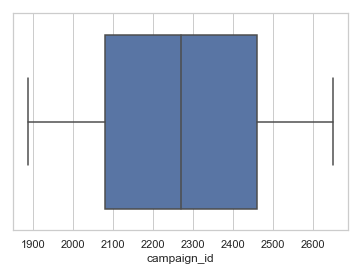

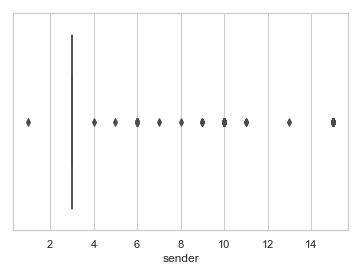

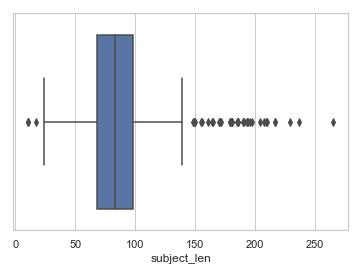

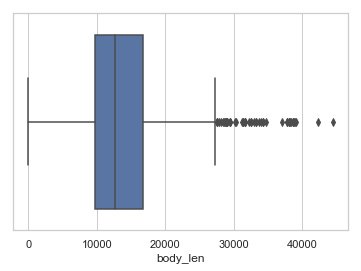

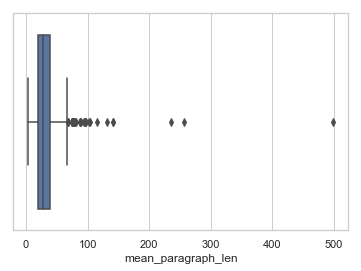

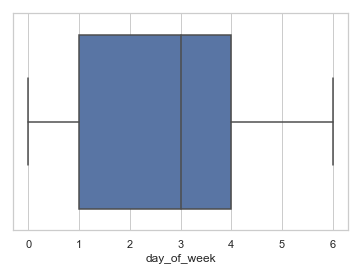

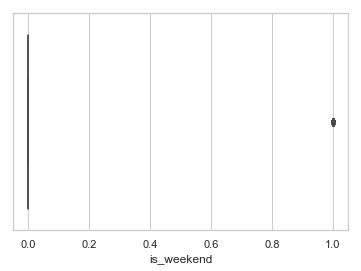

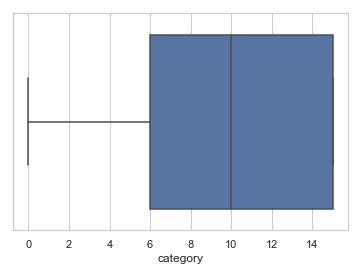

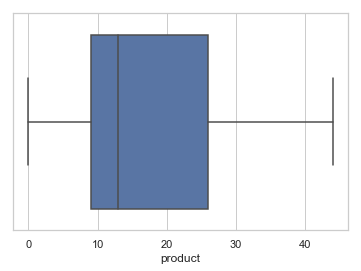

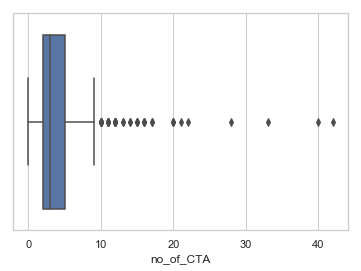

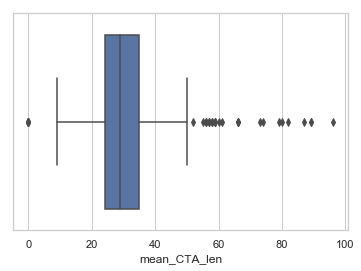

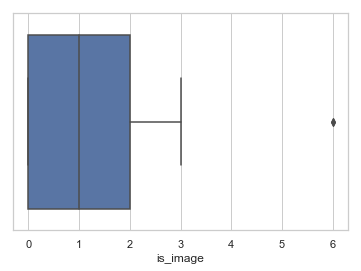

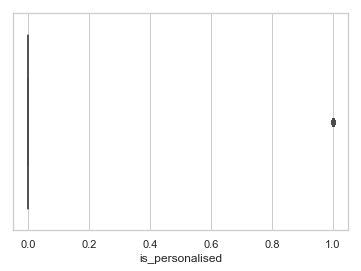

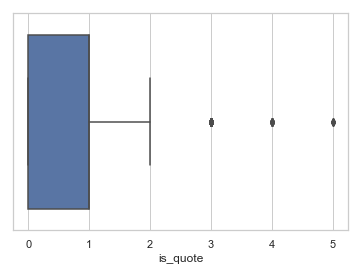

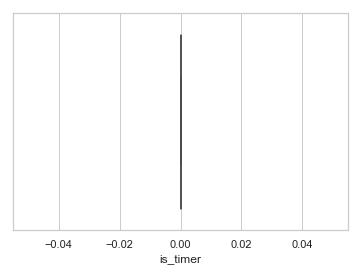

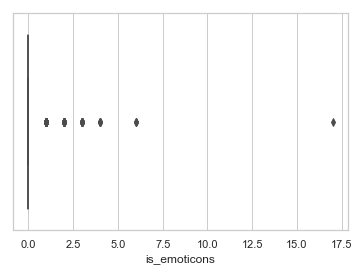

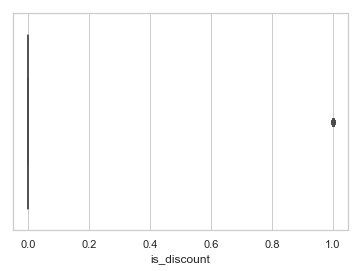

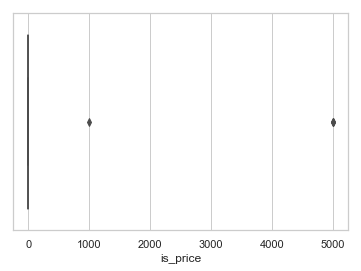

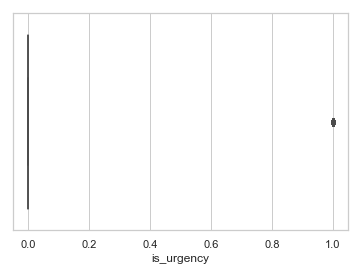

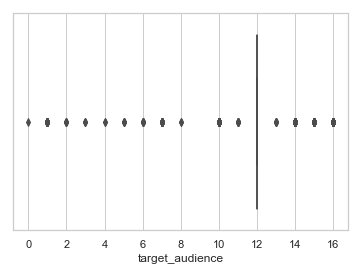

In [113]:
splot_cols=df_test.columns
for i in splot_cols:
    if df_test[i].dtype != 'object' and df_test[i].isnull().values.any() != True:
        sns.boxplot(df_test[i])
        plt.show()

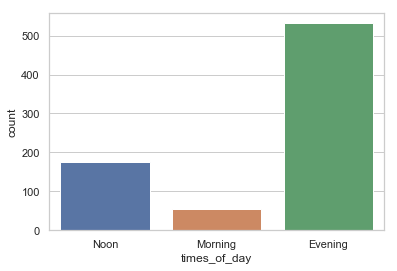

In [114]:
sns.countplot(df_test['times_of_day'])

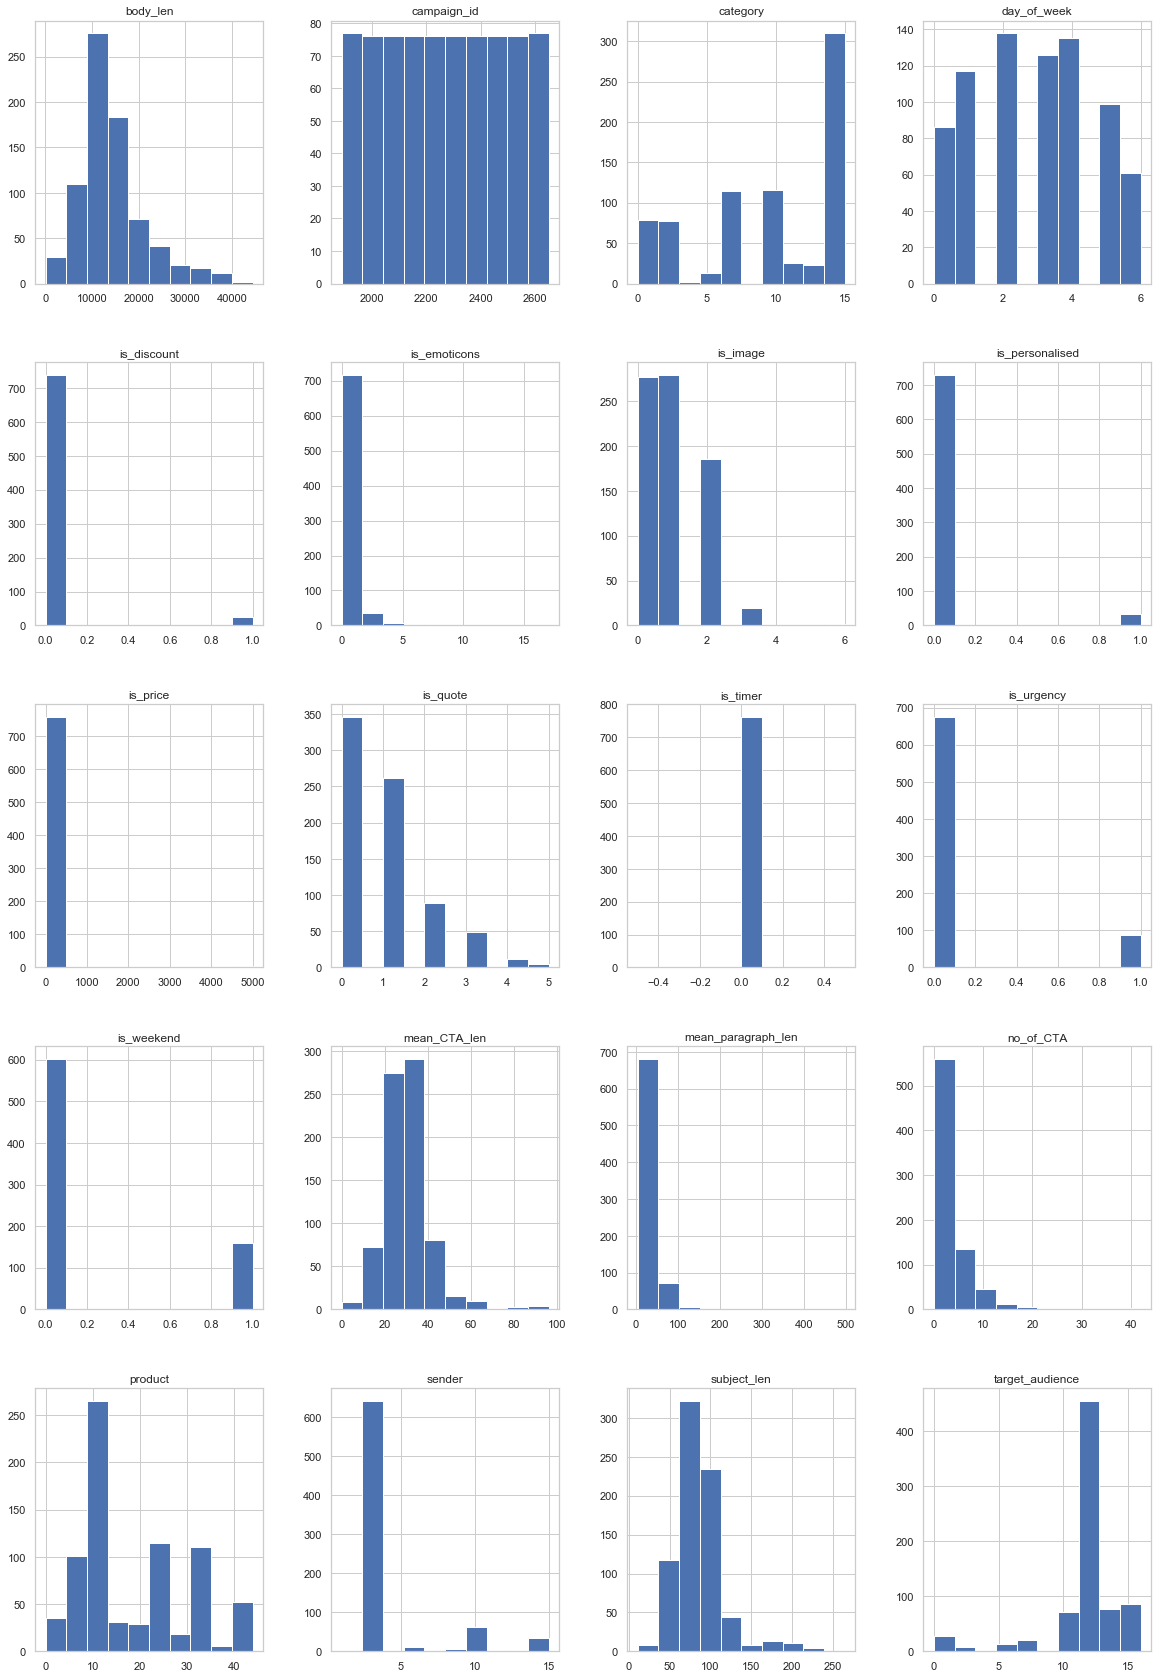

In [115]:
df_test.hist(figsize=(20,30));

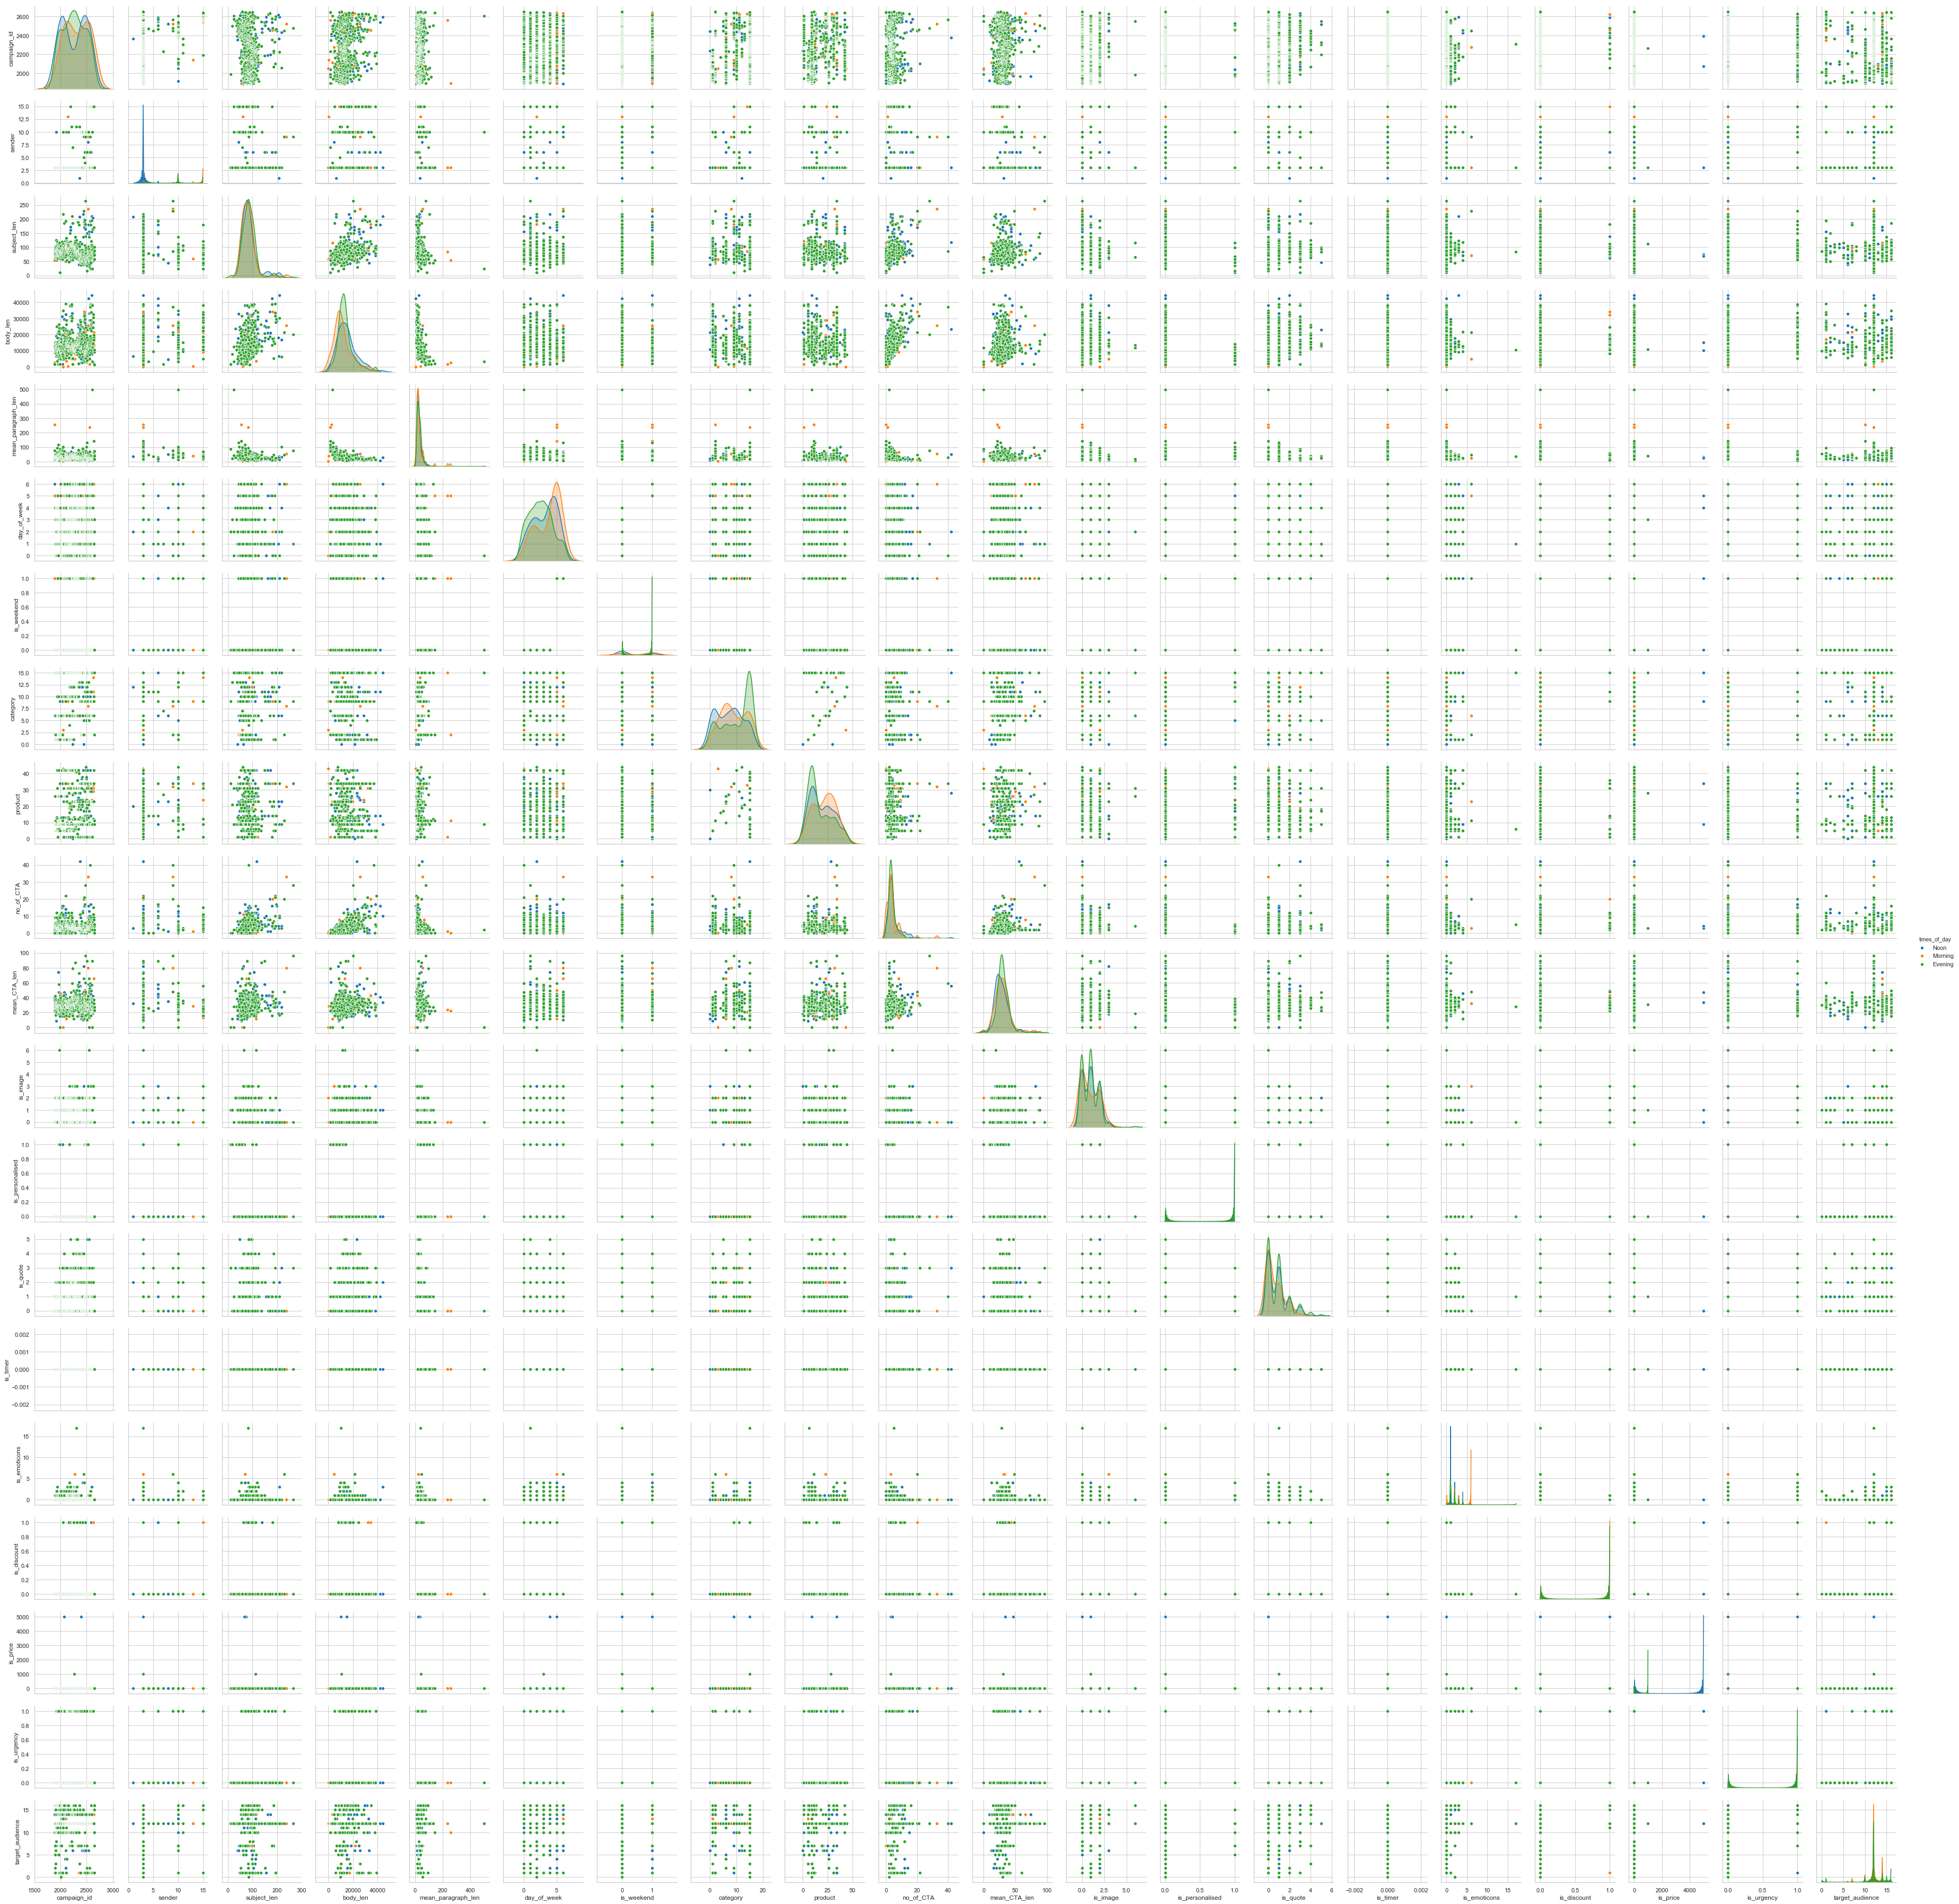

In [116]:
sns.pairplot(df_test,hue='times_of_day',diag_kind='kde',palette="tab10")

In [117]:
df_test.corr()

campaign_id    sender  subject_len  body_len  \
campaign_id            1.000000  0.411560    -0.045466  0.187940   
sender                 0.411560  1.000000    -0.111863  0.208592   
subject_len           -0.045466 -0.111863     1.000000  0.378969   
body_len               0.187940  0.208592     0.378969  1.000000   
mean_paragraph_len    -0.005044  0.064393    -0.147691 -0.431620   
day_of_week            0.040680 -0.053292    -0.085962 -0.044482   
is_weekend             0.032372 -0.080191    -0.041583 -0.082402   
category               0.236986  0.175009     0.046497  0.033640   
product                0.238287  0.092842    -0.054034 -0.052836   
no_of_CTA              0.085129  0.130724     0.403702  0.555295   
mean_CTA_len           0.090509 -0.015033     0.257604  0.116004   
is_image              -0.005268 -0.105251    -0.084130 -0.036393   
is_personalised        0.099112  0.088107    -0.237886 -0.208750   
is_quote               0.022825  0.023122     0.074327  0.201230   
is_timer                    NaN       NaN          NaN       NaN   
is_emoticons          -0.055647 -0.035915     0.095914 -0.024321   
is_discount            0.037165 -0.019168     0.099750  0.041196   
is_price               0.004605 -0.026597    -0.030135 -0.008029   
is_urgency            -0.005525 -0.019372     0.123488  0.075161   
target_audience       -0.107759 -0.077728    -0.033788 -0.138543   

                    mean_paragraph_len  day_of_week  is_weekend  category  \
campaign_id                  -0.005044     0.040680    0.032372  0.236986   
sender                        0.064393    -0.053292   -0.080191  0.175009   
subject_len                  -0.147691    -0.085962   -0.041583  0.046497   
body_len                     -0.431620    -0.044482   -0.082402  0.033640   
mean_paragraph_len            1.000000    -0.079177   -0.013382  0.083086   
day_of_week                  -0.079177     1.000000    0.728702 -0.050464   
is_weekend                   -0.013382     0.728702    1.000000 -0.048830   
category                      0.083086    -0.050464   -0.048830  1.000000   
product                      -0.085570    -0.000903   -0.015765  0.054568   
no_of_CTA                    -0.178209    -0.084150   -0.036285 -0.051943   
mean_CTA_len                 -0.049129    -0.016965   -0.030845  0.157876   
is_image                     -0.095433     0.002021    0.037638 -0.042007   
is_personalised               0.162166    -0.021832   -0.030538  0.114731   
is_quote                     -0.064804    -0.030953   -0.045055 -0.012061   
is_timer                           NaN          NaN         NaN       NaN   
is_emoticons                 -0.006089     0.020045    0.013991  0.106201   
is_discount                  -0.015223    -0.039487   -0.056072  0.129913   
is_price                     -0.012240     0.052085    0.016769  0.020813   
is_urgency                   -0.057602     0.059958    0.037815  0.173748   
target_audience              -0.014017     0.087468    0.056603 -0.023118   

                     product  no_of_CTA  mean_CTA_len  is_image  \
campaign_id         0.238287   0.085129      0.090509 -0.005268   
sender              0.092842   0.130724     -0.015033 -0.105251   
subject_len        -0.054034   0.403702      0.257604 -0.084130   
body_len           -0.052836   0.555295      0.116004 -0.036393   
mean_paragraph_len -0.085570  -0.178209     -0.049129 -0.095433   
day_of_week        -0.000903  -0.084150     -0.016965  0.002021   
is_weekend         -0.015765  -0.036285     -0.030845  0.037638   
category            0.054568  -0.051943      0.157876 -0.042007   
product             1.000000   0.027866      0.090420  0.065764   
no_of_CTA           0.027866   1.000000      0.203466 -0.012888   
mean_CTA_len        0.090420   0.203466      1.000000 -0.005771   
is_image            0.065764  -0.012888     -0.005771  1.000000   
is_personalised     0.091517  -0.153429     -0.207410  0.028727   
is_quote           -0.073500   0.05

In [118]:
df_test['is_timer'].value_counts()

0    762
Name: is_timer, dtype: int64

In [119]:
copy_test = df_test.drop('is_timer',axis=1)
test_file_ids = copy_test['campaign_id']
copy_test = copy_test.drop('campaign_id',axis=1)
copy_test = copy_test.drop('subject_len',axis=1)
copy_test = copy_test.drop('target_audience',axis=1)
copy_test.head()

sender  body_len  mean_paragraph_len  day_of_week  is_weekend times_of_day  \
0       3     12871                  11            6           1         Noon   
1       3      2569                 256            5           1      Morning   
2       3      1473                  78            4           0      Evening   
3       3      1473                  78            3           0      Evening   
4       3      9020                  29            3           0         Noon   

   category  product  no_of_CTA  mean_CTA_len  is_image  is_personalised  \
0         6       26          3            37         1                0   
1         2       11          0            22         0                0   
2         2       11          0            22         1                0   
3         2       11          0            22         1                0   
4         6       26          2            40         0                0   

   is_quote  is_emoticons  is_discount  is_price  is_urgency  
0         0             1            0         0           0  
1         0             0            0         0           0  
2         1             0            0         0           0  
3         1             0            0         0           0  
4         0             0            0         0           0

In [120]:
copy_test.corr()

sender  body_len  mean_paragraph_len  day_of_week  \
sender              1.000000  0.208592            0.064393    -0.053292   
body_len            0.208592  1.000000           -0.431620    -0.044482   
mean_paragraph_len  0.064393 -0.431620            1.000000    -0.079177   
day_of_week        -0.053292 -0.044482           -0.079177     1.000000   
is_weekend         -0.080191 -0.082402           -0.013382     0.728702   
category            0.175009  0.033640            0.083086    -0.050464   
product             0.092842 -0.052836           -0.085570    -0.000903   
no_of_CTA           0.130724  0.555295           -0.178209    -0.084150   
mean_CTA_len       -0.015033  0.116004           -0.049129    -0.016965   
is_image           -0.105251 -0.036393           -0.095433     0.002021   
is_personalised     0.088107 -0.208750            0.162166    -0.021832   
is_quote            0.023122  0.201230           -0.064804    -0.030953   
is_emoticons       -0.035915 -0.024321           -0.006089     0.020045   
is_discount        -0.019168  0.041196           -0.015223    -0.039487   
is_price           -0.026597 -0.008029           -0.012240     0.052085   
is_urgency         -0.019372  0.075161           -0.057602     0.059958   

                    is_weekend  category   product  no_of_CTA  mean_CTA_len  \
sender               -0.080191  0.175009  0.092842   0.130724     -0.015033   
body_len             -0.082402  0.033640 -0.052836   0.555295      0.116004   
mean_paragraph_len   -0.013382  0.083086 -0.085570  -0.178209     -0.049129   
day_of_week           0.728702 -0.050464 -0.000903  -0.084150     -0.016965   
is_weekend            1.000000 -0.048830 -0.015765  -0.036285     -0.030845   
category             -0.048830  1.000000  0.054568  -0.051943      0.157876   
product              -0.015765  0.054568  1.000000   0.027866      0.090420   
no_of_CTA            -0.036285 -0.051943  0.027866   1.000000      0.203466   
mean_CTA_len         -0.030845  0.157876  0.090420   0.203466      1.000000   
is_image              0.037638 -0.042007  0.065764  -0.012888     -0.005771   
is_personalised      -0.030538  0.114731  0.091517  -0.153429     -0.207410   
is_quote             -0.045055 -0.012061 -0.073500   0.054843      0.010609   
is_emoticons          0.013991  0.106201  0.000429  -0.003570      0.046109   
is_discount          -0.056072  0.129913  0.035757   0.055552      0.080515   
is_price              0.016769  0.020813  0.044918  -0.010015      0.046997   
is_urgency            0.037815  0.173748 -0.107174   0.016368      0.086913   

                    is_image  is_personalised  is_quote  is_emoticons  \
sender             -0.105251         0.088107  0.023122     -0.035915   
body_len           -0.036393        -0.208750  0.201230     -0.024321   
mean_paragraph_len -0.095433         0.162166 -0.064804     -0.006089   
day_of_week         0.002021        -0.021832 -0.030953      0.020045   
is_weekend          0.037638        -0.030538 -0.045055      0.013991   
category           -0.042007         0.114731 -0.012061      0.106201   
product             0.065764         0.091517 -0.073500      0.000429   
no_of_CTA          -0.012888        -0.153429  0.054843     -0.003570   
mean_CTA_len       -0.005771        -0.207410  0.010609      0.046109   
is_image            1.000000         0.028727 -0.100427      0.011674   
is_personalised     0.028727         1.000000  0.046797     -0.022797   
is_quote           -0.100427         0.046797  1.000000      0.000613   
is_emoticons        0.011674        -0.022797  0.000613      1.000000   
is_discount        -0.005265        -0.038368 -0.020146     -0.006688   
is_price           -0.043122        -0.014177 -0.052014     -0.019588   
is_urgency         -0.014012        -0.076384 -0.057169      0.148882   

                    is_discount  is_price  is_urgency  
sender                -0.019168 -0.026597   -0.019372  
body_len               0.041196 -0.008029    0.0

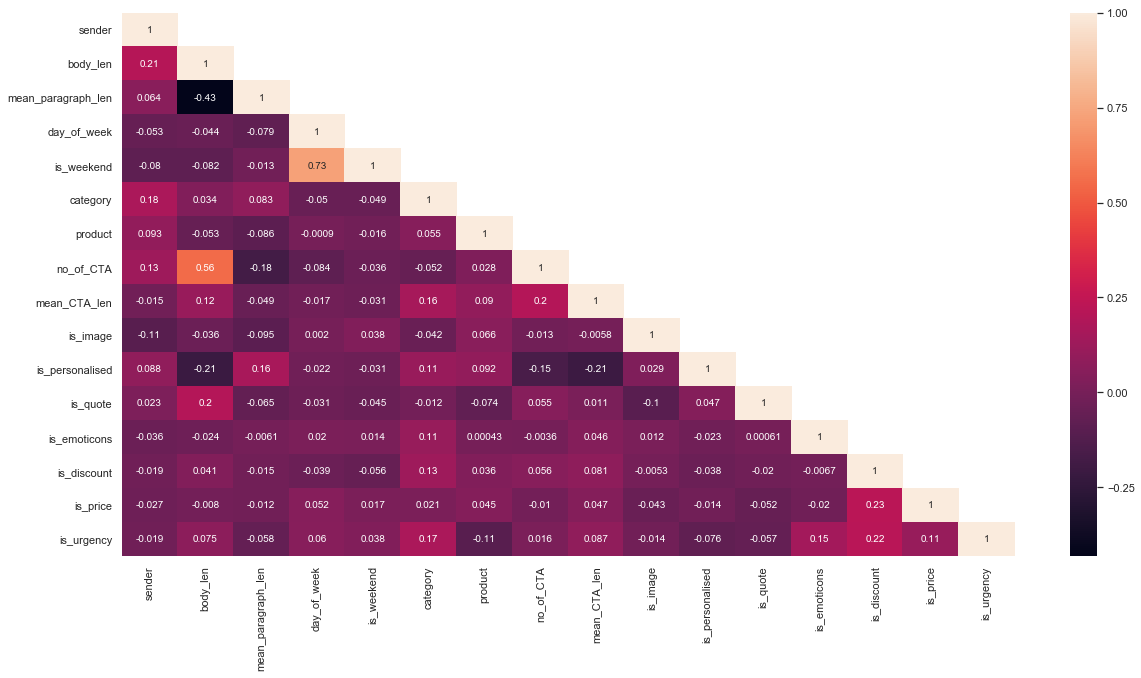

In [121]:
plt.figure(figsize=(20,10))
sns.heatmap(copy_test.corr(), annot=True,mask=np.triu(copy_test.corr(),+1))

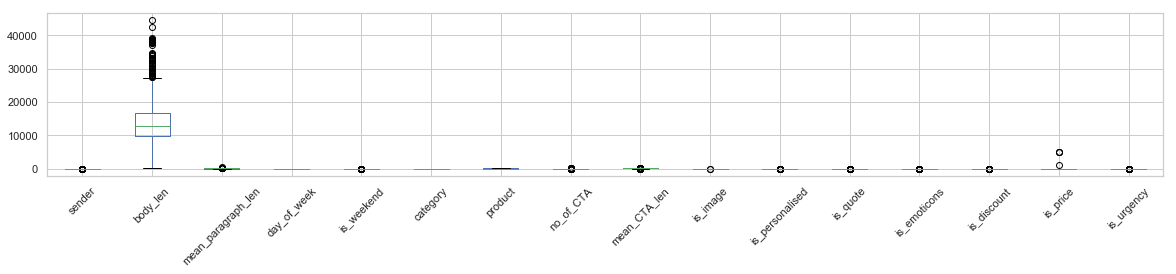

In [122]:
copy_test.boxplot(figsize=(20,3))
plt.xticks(rotation=45)
plt.show()

In [123]:
df_cat_test = copy_test.select_dtypes(include = ['object'])
df_num_test = copy_test.select_dtypes(include = ['float64','int64'])
df_cat_test.head()

times_of_day
0         Noon
1      Morning
2      Evening
3      Evening
4         Noon

In [124]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df_cat_test['times_of_day']= label_encoder.fit_transform(df_cat_test['times_of_day'])

In [125]:
df_test_copy = pd.concat([df_cat_test,df_num_test],axis=1)
df_test_copy.head()

times_of_day  sender  body_len  mean_paragraph_len  day_of_week  \
0             2       3     12871                  11            6   
1             1       3      2569                 256            5   
2             0       3      1473                  78            4   
3             0       3      1473                  78            3   
4             2       3      9020                  29            3   

   is_weekend  category  product  no_of_CTA  mean_CTA_len  is_image  \
0           1         6       26          3            37         1   
1           1         2       11          0            22         0   
2           0         2       11          0            22         1   
3           0         2       11          0            22         1   
4           0         6       26          2            40         0   

   is_personalised  is_quote  is_emoticons  is_discount  is_price  is_urgency  
0                0         0             1            0         0           0  
1                0         0             0            0         0           0  
2                0         1             0            0         0           0  
3                0         1             0            0         0           0  
4                0         0             0            0         0           0

In [126]:
#Scale the data
# df_test_scaled = df_test_copy.apply(zscore)
# df_test_scaled.head()
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# df_scaled = scaler.fit_transform(x.to_numpy())
# df_scaled = pd.DataFrame(df_scaled, columns=[x.columns])
# df_scaled.head()

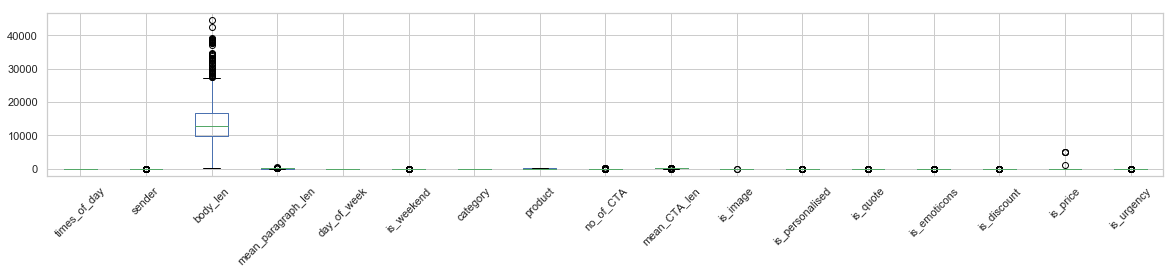

In [127]:
df_test_copy.boxplot(figsize=(20,3))
plt.xticks(rotation=45)
plt.show()

In [128]:
# for column in df_test_scaled.columns:
#     lr,ur=remove_outlier(df_test_scaled[column])
#     df_test_scaled[column]=np.where(df_test_scaled[column]>ur,ur,df_test_scaled[column])
#     df_test_scaled[column]=np.where(df_test_scaled[column]<lr,lr,df_test_scaled[column])

In [129]:
final_predictions = xgb_model.predict(df_test_copy)
submission=pd.DataFrame([test_file_ids,final_predictions]).T
submission.rename(columns={"Unnamed 0": "click_rate"},inplace=True)
submission.to_csv('submission.csv',index = False)

In [139]:
features = x_train.columns
resultsDf3 = pd.concat([pd.DataFrame(features),pd.DataFrame((rf_best_model.feature_importances_)*100)],axis=1)
resultsDf3.columns =['Features','Importance %']
resultsDf3.sort_values(['Importance %'], ascending=False).reset_index(drop=True).sort_values('Importance %',ascending=False)

Features  Importance %
0             body_len     34.057771
1   mean_paragraph_len     16.704920
2            no_of_CTA     12.703256
3         mean_CTA_len     11.240237
4             category      5.716679
5              product      5.196120
6          day_of_week      3.802395
7         times_of_day      3.550093
8             is_image      2.171026
9             is_quote      2.073928
10              sender      1.031374
11          is_weekend      0.872505
12     is_personalised      0.616150
13        is_emoticons      0.193758
14          is_urgency      0.067951
15         is_discount      0.001671
16            is_price      0.000165

### The Marketing team need to focus on these critical features to improve the CTR in the email campaign.

### The $ body $  $ length $ is the most important feature having 34% and body length of the email needs to crisp and catchy for the customers to Improve the CTR.